## EXP_2467_seq_prune_08_4_256_run(1-10)
Dan Cox May 2021 CS299 Project

#### Imports

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import os
import warnings
from collections import OrderedDict

from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle

import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten,Reshape
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import pickle
import tempfile
import n_cut.n_cut as nc
import n_cut.MNIST_helper as mh

#### Make experiments dict

In [4]:
exp_dict = OrderedDict()

#### Get MNIST data

In [5]:
# Get mnist data split into train and test 60000 x 28 x 28 train, 10000 x 28 x28 test
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train/255.0
x_test = x_test/255.0

#### Run experiment many times (num_runs)

run 0
Instructions for updating:
Please use `layer.add_weight` method instead.
round0 [4 7 6 2]
4
Epoch 1/5
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
1250/1250 - 4s - loss: 0.0485 - accuracy: 0.9823 - val_loss: 0.0277 - val_accuracy: 0.9937
Epoch 2/5
1250/1250 - 3s - loss: 0.0027 - accuracy: 0.9994 - val_loss: 0.0259 - val_accuracy: 0.9953
Epoch 3/5
1250/1250 - 3s - loss: 0.0024 - accuracy: 0.9992 - val_loss: 0.0265 - val_accuracy: 0.9953
Epoch 4/5
1250/1250 - 3s - loss: 1.7900e-05 - accuracy: 1.0000 - val_loss: 0.0335 - val_accuracy: 0.9953
Epoch 5/5
1250/1250 - 3s - loss: 3.4562e-06 - accuracy: 1.0000 - val_loss: 0.0370 - val_accuracy: 0.9953


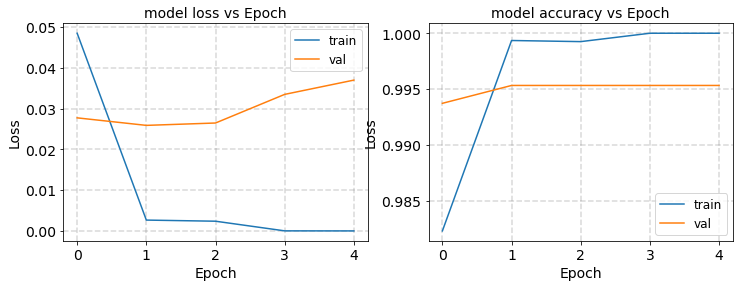

7
Epoch 1/5
1250/1250 - 3s - loss: 0.0598 - accuracy: 0.9894 - val_loss: 0.0390 - val_accuracy: 0.9905
Epoch 2/5
1250/1250 - 3s - loss: 0.0015 - accuracy: 0.9996 - val_loss: 0.0508 - val_accuracy: 0.9921
Epoch 3/5
1250/1250 - 3s - loss: 3.7812e-05 - accuracy: 1.0000 - val_loss: 0.0586 - val_accuracy: 0.9921
Epoch 4/5
1250/1250 - 3s - loss: 1.1363e-05 - accuracy: 1.0000 - val_loss: 0.0645 - val_accuracy: 0.9921
Epoch 5/5
1250/1250 - 3s - loss: 4.4765e-06 - accuracy: 1.0000 - val_loss: 0.0694 - val_accuracy: 0.9921


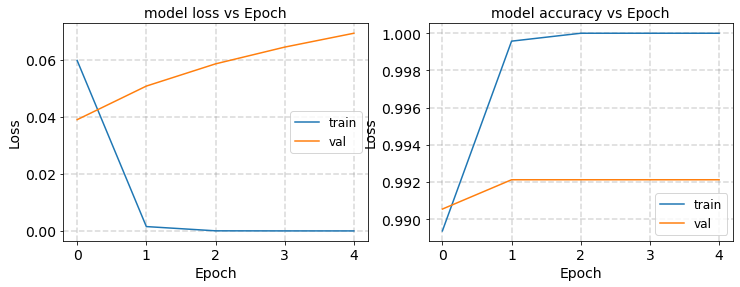

6
Epoch 1/5
1250/1250 - 3s - loss: 0.0672 - accuracy: 0.9916 - val_loss: 0.0301 - val_accuracy: 0.9944
Epoch 2/5
1250/1250 - 3s - loss: 2.9839e-04 - accuracy: 0.9999 - val_loss: 0.0318 - val_accuracy: 0.9961
Epoch 3/5
1250/1250 - 3s - loss: 1.3610e-05 - accuracy: 1.0000 - val_loss: 0.0375 - val_accuracy: 0.9961
Epoch 4/5
1250/1250 - 3s - loss: 2.8266e-06 - accuracy: 1.0000 - val_loss: 0.0415 - val_accuracy: 0.9961
Epoch 5/5
1250/1250 - 3s - loss: 9.7141e-07 - accuracy: 1.0000 - val_loss: 0.0448 - val_accuracy: 0.9952


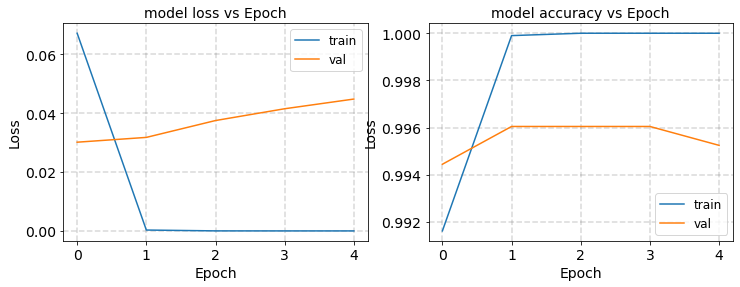

2
Epoch 1/5
1250/1250 - 3s - loss: 0.0701 - accuracy: 0.9893 - val_loss: 0.0397 - val_accuracy: 0.9898
Epoch 2/5
1250/1250 - 3s - loss: 2.0943e-04 - accuracy: 0.9999 - val_loss: 0.0586 - val_accuracy: 0.9883
Epoch 3/5
1250/1250 - 3s - loss: 1.5700e-05 - accuracy: 1.0000 - val_loss: 0.0672 - val_accuracy: 0.9883
Epoch 4/5
1250/1250 - 3s - loss: 4.9325e-06 - accuracy: 1.0000 - val_loss: 0.0755 - val_accuracy: 0.9883
Epoch 5/5
1250/1250 - 3s - loss: 1.7917e-06 - accuracy: 1.0000 - val_loss: 0.0809 - val_accuracy: 0.9883


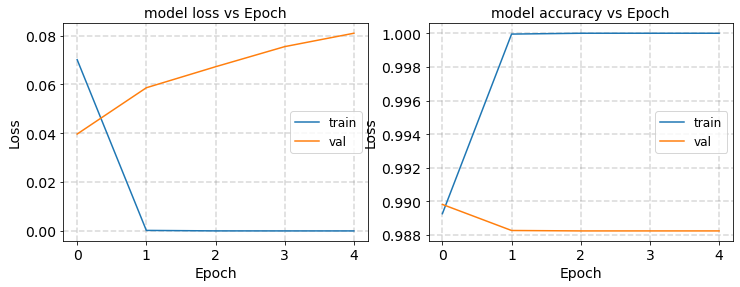

round1 [7 4 6 2]
7
Epoch 1/5
1250/1250 - 3s - loss: 0.0675 - accuracy: 0.9901 - val_loss: 0.0447 - val_accuracy: 0.9882
Epoch 2/5
1250/1250 - 3s - loss: 6.6953e-04 - accuracy: 0.9999 - val_loss: 0.0570 - val_accuracy: 0.9890
Epoch 3/5
1250/1250 - 3s - loss: 4.0326e-05 - accuracy: 1.0000 - val_loss: 0.0629 - val_accuracy: 0.9906
Epoch 4/5
1250/1250 - 3s - loss: 9.8900e-06 - accuracy: 1.0000 - val_loss: 0.0722 - val_accuracy: 0.9890
Epoch 5/5
1250/1250 - 3s - loss: 3.3924e-06 - accuracy: 1.0000 - val_loss: 0.0773 - val_accuracy: 0.9905


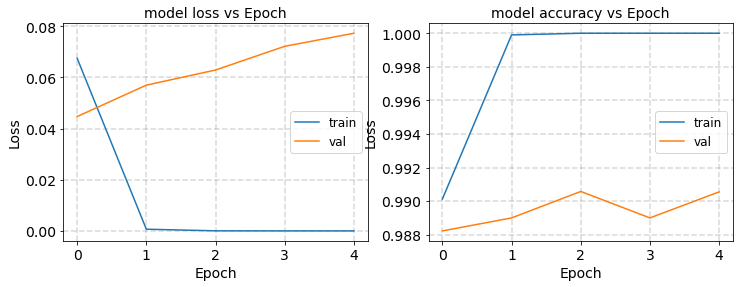

4
Epoch 1/5
1250/1250 - 3s - loss: 0.0668 - accuracy: 0.9871 - val_loss: 0.0345 - val_accuracy: 0.9922
Epoch 2/5
1250/1250 - 3s - loss: 6.0755e-04 - accuracy: 0.9999 - val_loss: 0.0469 - val_accuracy: 0.9914
Epoch 3/5
1250/1250 - 3s - loss: 4.6235e-05 - accuracy: 1.0000 - val_loss: 0.0527 - val_accuracy: 0.9914
Epoch 4/5
1250/1250 - 3s - loss: 1.3797e-05 - accuracy: 1.0000 - val_loss: 0.0571 - val_accuracy: 0.9906
Epoch 5/5
1250/1250 - 3s - loss: 4.7474e-06 - accuracy: 1.0000 - val_loss: 0.0636 - val_accuracy: 0.9906


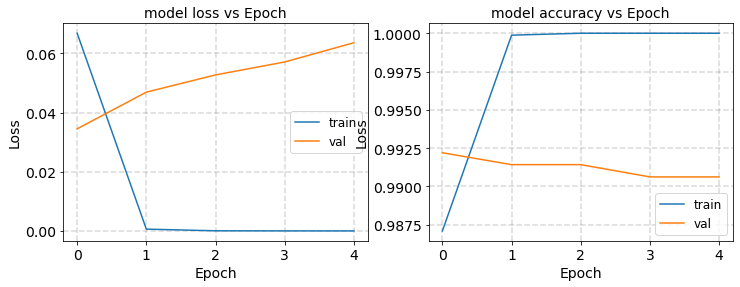

6
Epoch 1/5
1250/1250 - 3s - loss: 0.0597 - accuracy: 0.9922 - val_loss: 0.0343 - val_accuracy: 0.9912
Epoch 2/5
1250/1250 - 3s - loss: 2.6804e-04 - accuracy: 0.9999 - val_loss: 0.0421 - val_accuracy: 0.9937
Epoch 3/5
1250/1250 - 3s - loss: 2.1969e-05 - accuracy: 1.0000 - val_loss: 0.0483 - val_accuracy: 0.9944
Epoch 4/5
1250/1250 - 3s - loss: 4.6899e-06 - accuracy: 1.0000 - val_loss: 0.0529 - val_accuracy: 0.9944
Epoch 5/5
1250/1250 - 3s - loss: 1.2726e-06 - accuracy: 1.0000 - val_loss: 0.0558 - val_accuracy: 0.9944


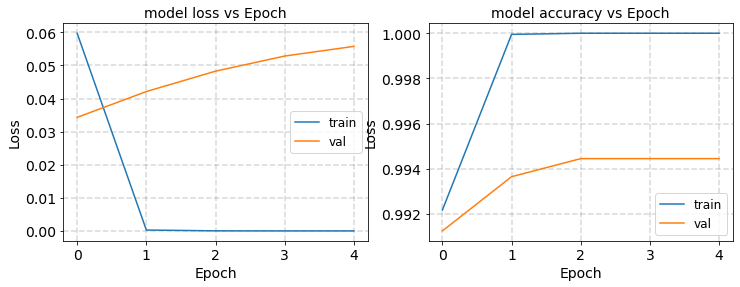

2
Epoch 1/5
1250/1250 - 3s - loss: 0.0744 - accuracy: 0.9889 - val_loss: 0.0453 - val_accuracy: 0.9898
Epoch 2/5
1250/1250 - 3s - loss: 2.2012e-04 - accuracy: 1.0000 - val_loss: 0.0501 - val_accuracy: 0.9906
Epoch 3/5
1250/1250 - 3s - loss: 3.3263e-05 - accuracy: 1.0000 - val_loss: 0.0593 - val_accuracy: 0.9906
Epoch 4/5
1250/1250 - 3s - loss: 6.8920e-06 - accuracy: 1.0000 - val_loss: 0.0652 - val_accuracy: 0.9898
Epoch 5/5
1250/1250 - 3s - loss: 2.0457e-06 - accuracy: 1.0000 - val_loss: 0.0716 - val_accuracy: 0.9906


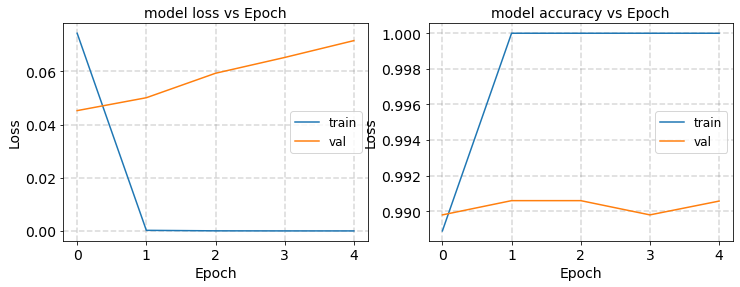

round2 [4 7 6 2]
4
Epoch 1/5
1250/1250 - 3s - loss: 0.0689 - accuracy: 0.9898 - val_loss: 0.0292 - val_accuracy: 0.9937
Epoch 2/5
1250/1250 - 3s - loss: 7.6733e-04 - accuracy: 0.9998 - val_loss: 0.0364 - val_accuracy: 0.9906
Epoch 3/5
1250/1250 - 3s - loss: 7.1381e-05 - accuracy: 1.0000 - val_loss: 0.0455 - val_accuracy: 0.9914
Epoch 4/5
1250/1250 - 3s - loss: 1.7693e-05 - accuracy: 1.0000 - val_loss: 0.0485 - val_accuracy: 0.9922
Epoch 5/5
1250/1250 - 3s - loss: 6.2860e-06 - accuracy: 1.0000 - val_loss: 0.0516 - val_accuracy: 0.9922


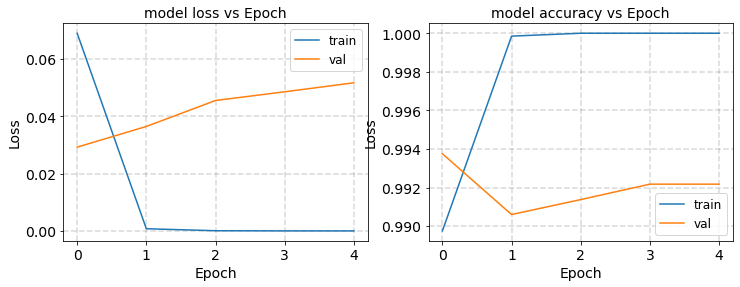

7
Epoch 1/5
1250/1250 - 3s - loss: 0.0682 - accuracy: 0.9904 - val_loss: 0.0273 - val_accuracy: 0.9906
Epoch 2/5
1250/1250 - 3s - loss: 5.7557e-04 - accuracy: 0.9999 - val_loss: 0.0286 - val_accuracy: 0.9945
Epoch 3/5
1250/1250 - 3s - loss: 3.7012e-05 - accuracy: 1.0000 - val_loss: 0.0303 - val_accuracy: 0.9945
Epoch 4/5
1250/1250 - 3s - loss: 1.0880e-05 - accuracy: 1.0000 - val_loss: 0.0321 - val_accuracy: 0.9953
Epoch 5/5
1250/1250 - 3s - loss: 4.0674e-06 - accuracy: 1.0000 - val_loss: 0.0340 - val_accuracy: 0.9953


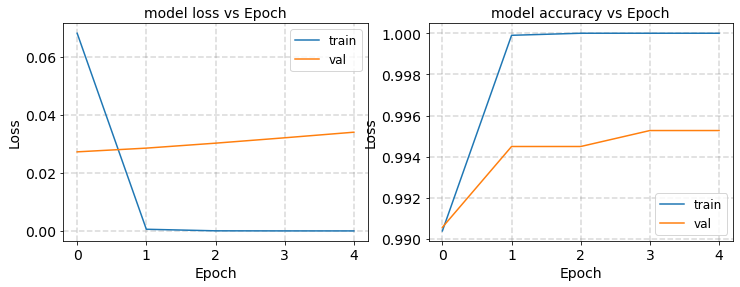

6
Epoch 1/5
1250/1250 - 3s - loss: 0.0898 - accuracy: 0.9899 - val_loss: 0.0375 - val_accuracy: 0.9937
Epoch 2/5
1250/1250 - 3s - loss: 2.2009e-04 - accuracy: 1.0000 - val_loss: 0.0465 - val_accuracy: 0.9937
Epoch 3/5
1250/1250 - 3s - loss: 2.0807e-05 - accuracy: 1.0000 - val_loss: 0.0505 - val_accuracy: 0.9937
Epoch 4/5
1250/1250 - 3s - loss: 6.6065e-06 - accuracy: 1.0000 - val_loss: 0.0553 - val_accuracy: 0.9937
Epoch 5/5
1250/1250 - 3s - loss: 2.5721e-06 - accuracy: 1.0000 - val_loss: 0.0585 - val_accuracy: 0.9937


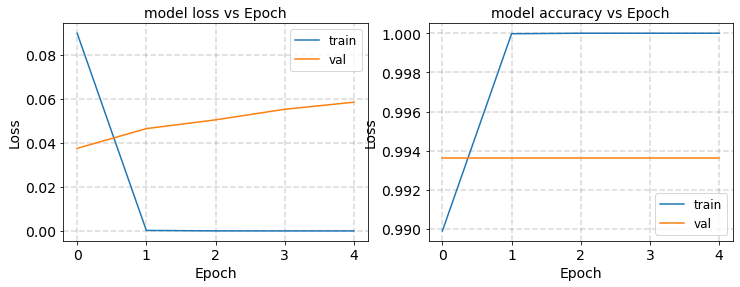

2
Epoch 1/5
1250/1250 - 3s - loss: 0.0850 - accuracy: 0.9897 - val_loss: 0.0488 - val_accuracy: 0.9898
Epoch 2/5
1250/1250 - 3s - loss: 2.1886e-04 - accuracy: 1.0000 - val_loss: 0.0569 - val_accuracy: 0.9898
Epoch 3/5
1250/1250 - 3s - loss: 5.1683e-05 - accuracy: 1.0000 - val_loss: 0.0617 - val_accuracy: 0.9906
Epoch 4/5
1250/1250 - 3s - loss: 1.7443e-05 - accuracy: 1.0000 - val_loss: 0.0679 - val_accuracy: 0.9890
Epoch 5/5
1250/1250 - 3s - loss: 6.6615e-06 - accuracy: 1.0000 - val_loss: 0.0732 - val_accuracy: 0.9898


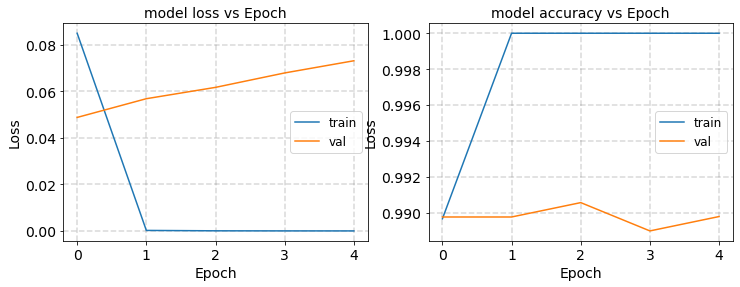

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_flatten  (None, 784)               1         
_________________________________________________________________
prune_low_magnitude_dense (P (None, 256)               401666    
_________________________________________________________________
prune_low_magnitude_dense_1  (None, 256)               131330    
_________________________________________________________________
prune_low_magnitude_dense_2  (None, 256)               131330    
_________________________________________________________________
prune_low_magnitude_dense_3  (None, 256)               131330    
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 1028      
Total params: 796,685
Trainable params: 399,364
Non-trainable params: 397,321
__________________________________________

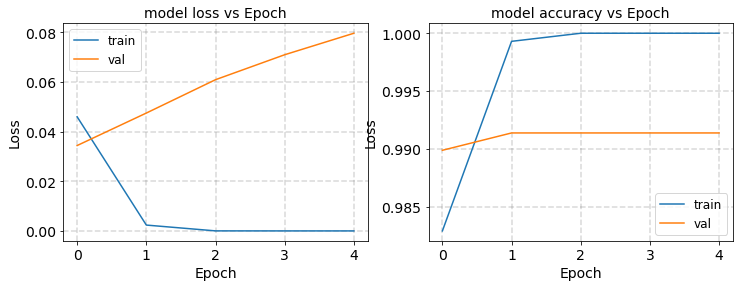

6
Epoch 1/5
1250/1250 - 3s - loss: 0.0499 - accuracy: 0.9905 - val_loss: 0.0398 - val_accuracy: 0.9889
Epoch 2/5
1250/1250 - 3s - loss: 2.9472e-04 - accuracy: 0.9999 - val_loss: 0.0456 - val_accuracy: 0.9905
Epoch 3/5
1250/1250 - 3s - loss: 1.7877e-05 - accuracy: 1.0000 - val_loss: 0.0538 - val_accuracy: 0.9905
Epoch 4/5
1250/1250 - 3s - loss: 4.0275e-06 - accuracy: 1.0000 - val_loss: 0.0614 - val_accuracy: 0.9905
Epoch 5/5
1250/1250 - 3s - loss: 1.0480e-06 - accuracy: 1.0000 - val_loss: 0.0677 - val_accuracy: 0.9913


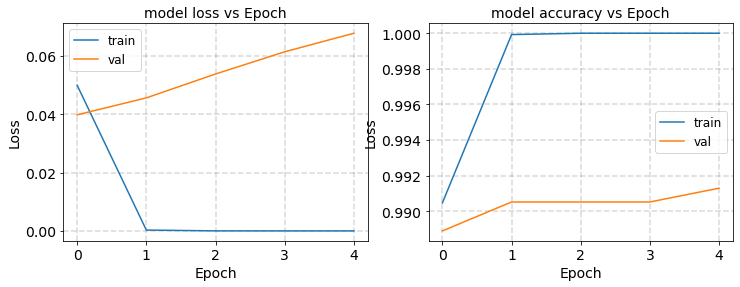

4
Epoch 1/5
1250/1250 - 3s - loss: 0.0768 - accuracy: 0.9869 - val_loss: 0.0277 - val_accuracy: 0.9914
Epoch 2/5
1250/1250 - 3s - loss: 0.0016 - accuracy: 0.9998 - val_loss: 0.0432 - val_accuracy: 0.9906
Epoch 3/5
1250/1250 - 3s - loss: 1.5339e-04 - accuracy: 1.0000 - val_loss: 0.0541 - val_accuracy: 0.9898
Epoch 4/5
1250/1250 - 3s - loss: 1.3642e-05 - accuracy: 1.0000 - val_loss: 0.0598 - val_accuracy: 0.9898
Epoch 5/5
1250/1250 - 3s - loss: 4.9494e-06 - accuracy: 1.0000 - val_loss: 0.0649 - val_accuracy: 0.9898


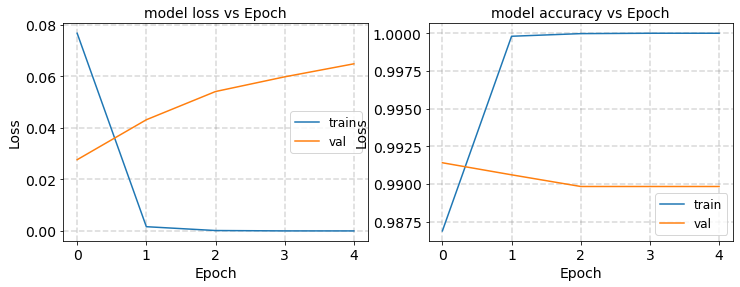

7
Epoch 1/5
1250/1250 - 3s - loss: 0.0665 - accuracy: 0.9885 - val_loss: 0.0401 - val_accuracy: 0.9898
Epoch 2/5
1250/1250 - 3s - loss: 0.0014 - accuracy: 0.9997 - val_loss: 0.0428 - val_accuracy: 0.9914
Epoch 3/5
1250/1250 - 3s - loss: 3.8749e-05 - accuracy: 1.0000 - val_loss: 0.0473 - val_accuracy: 0.9922
Epoch 4/5
1250/1250 - 3s - loss: 1.2816e-05 - accuracy: 1.0000 - val_loss: 0.0513 - val_accuracy: 0.9922
Epoch 5/5
1250/1250 - 3s - loss: 4.7518e-06 - accuracy: 1.0000 - val_loss: 0.0541 - val_accuracy: 0.9922


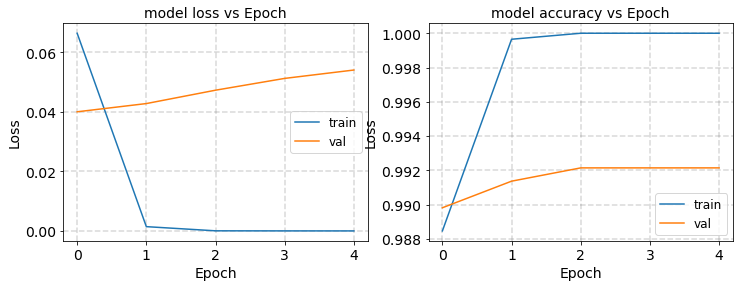

round1 [2 6 7 4]
2
Epoch 1/5
1250/1250 - 3s - loss: 0.0800 - accuracy: 0.9890 - val_loss: 0.0529 - val_accuracy: 0.9875
Epoch 2/5
1250/1250 - 3s - loss: 3.8873e-04 - accuracy: 0.9999 - val_loss: 0.0676 - val_accuracy: 0.9874
Epoch 3/5
1250/1250 - 3s - loss: 2.7606e-05 - accuracy: 1.0000 - val_loss: 0.0760 - val_accuracy: 0.9898
Epoch 4/5
1250/1250 - 3s - loss: 8.6131e-06 - accuracy: 1.0000 - val_loss: 0.0842 - val_accuracy: 0.9898
Epoch 5/5
1250/1250 - 3s - loss: 3.0302e-06 - accuracy: 1.0000 - val_loss: 0.0926 - val_accuracy: 0.9898


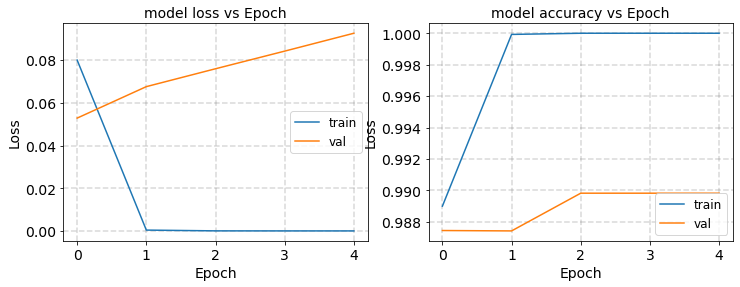

6
Epoch 1/5
1250/1250 - 3s - loss: 0.0590 - accuracy: 0.9917 - val_loss: 0.0288 - val_accuracy: 0.9929
Epoch 2/5
1250/1250 - 3s - loss: 1.4828e-04 - accuracy: 1.0000 - val_loss: 0.0404 - val_accuracy: 0.9920
Epoch 3/5
1250/1250 - 3s - loss: 1.6965e-05 - accuracy: 1.0000 - val_loss: 0.0463 - val_accuracy: 0.9912
Epoch 4/5
1250/1250 - 3s - loss: 5.4216e-06 - accuracy: 1.0000 - val_loss: 0.0500 - val_accuracy: 0.9912
Epoch 5/5
1250/1250 - 3s - loss: 1.9169e-06 - accuracy: 1.0000 - val_loss: 0.0531 - val_accuracy: 0.9929


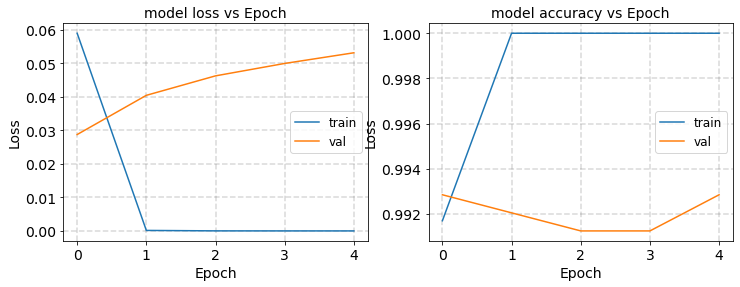

7
Epoch 1/5
1250/1250 - 3s - loss: 0.0818 - accuracy: 0.9887 - val_loss: 0.0278 - val_accuracy: 0.9937
Epoch 2/5
1250/1250 - 3s - loss: 0.0019 - accuracy: 0.9996 - val_loss: 0.0352 - val_accuracy: 0.9906
Epoch 3/5
1250/1250 - 3s - loss: 8.4470e-05 - accuracy: 1.0000 - val_loss: 0.0440 - val_accuracy: 0.9914
Epoch 4/5
1250/1250 - 3s - loss: 2.0502e-05 - accuracy: 1.0000 - val_loss: 0.0504 - val_accuracy: 0.9906
Epoch 5/5
1250/1250 - 3s - loss: 6.4590e-06 - accuracy: 1.0000 - val_loss: 0.0564 - val_accuracy: 0.9906


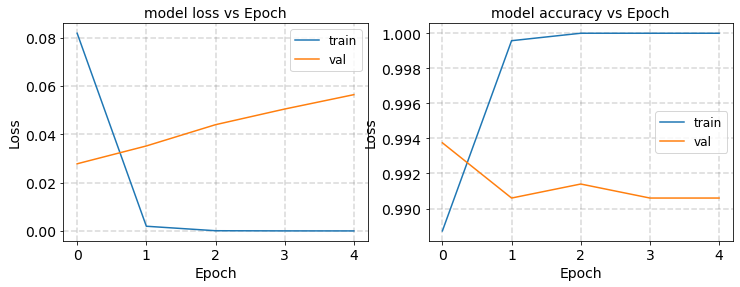

4
Epoch 1/5
1250/1250 - 3s - loss: 0.0828 - accuracy: 0.9870 - val_loss: 0.0340 - val_accuracy: 0.9937
Epoch 2/5
1250/1250 - 3s - loss: 8.9021e-04 - accuracy: 0.9998 - val_loss: 0.0490 - val_accuracy: 0.9930
Epoch 3/5
1250/1250 - 3s - loss: 8.5055e-05 - accuracy: 1.0000 - val_loss: 0.0546 - val_accuracy: 0.9922
Epoch 4/5
1250/1250 - 3s - loss: 2.2399e-05 - accuracy: 1.0000 - val_loss: 0.0589 - val_accuracy: 0.9922
Epoch 5/5
1250/1250 - 3s - loss: 8.6761e-06 - accuracy: 1.0000 - val_loss: 0.0636 - val_accuracy: 0.9922


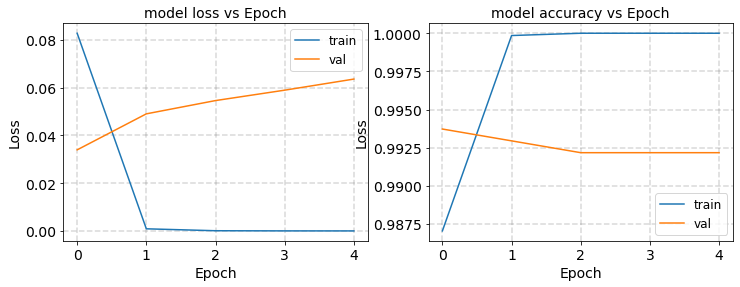

round2 [6 2 7 4]
6
Epoch 1/5
1250/1250 - 3s - loss: 0.0715 - accuracy: 0.9892 - val_loss: 0.0268 - val_accuracy: 0.9928
Epoch 2/5
1250/1250 - 3s - loss: 4.8871e-04 - accuracy: 0.9999 - val_loss: 0.0312 - val_accuracy: 0.9920
Epoch 3/5
1250/1250 - 3s - loss: 3.9286e-05 - accuracy: 1.0000 - val_loss: 0.0379 - val_accuracy: 0.9920
Epoch 4/5
1250/1250 - 3s - loss: 1.1133e-05 - accuracy: 1.0000 - val_loss: 0.0416 - val_accuracy: 0.9920
Epoch 5/5
1250/1250 - 3s - loss: 3.6234e-06 - accuracy: 1.0000 - val_loss: 0.0466 - val_accuracy: 0.9920


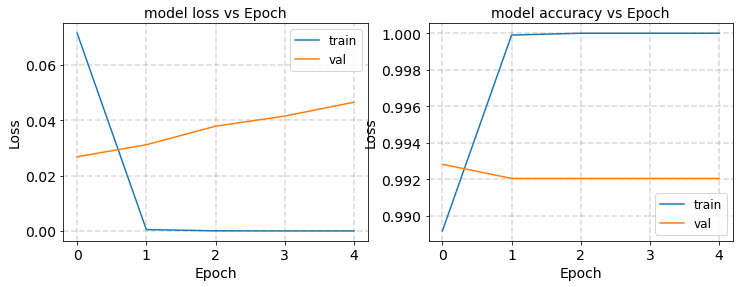

2
Epoch 1/5
1250/1250 - 3s - loss: 0.0708 - accuracy: 0.9924 - val_loss: 0.0432 - val_accuracy: 0.9874
Epoch 2/5
1250/1250 - 3s - loss: 1.6975e-04 - accuracy: 1.0000 - val_loss: 0.0502 - val_accuracy: 0.9898
Epoch 3/5
1250/1250 - 3s - loss: 3.9695e-05 - accuracy: 1.0000 - val_loss: 0.0575 - val_accuracy: 0.9890
Epoch 4/5
1250/1250 - 3s - loss: 1.2101e-05 - accuracy: 1.0000 - val_loss: 0.0641 - val_accuracy: 0.9898
Epoch 5/5
1250/1250 - 3s - loss: 3.8537e-06 - accuracy: 1.0000 - val_loss: 0.0720 - val_accuracy: 0.9890


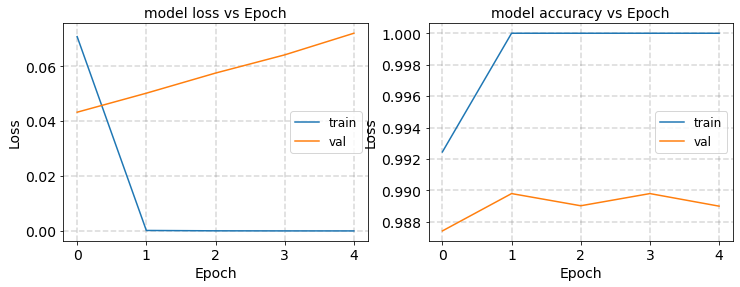

7
Epoch 1/5
1250/1250 - 3s - loss: 0.0756 - accuracy: 0.9891 - val_loss: 0.0309 - val_accuracy: 0.9930
Epoch 2/5
1250/1250 - 3s - loss: 4.9234e-04 - accuracy: 0.9999 - val_loss: 0.0367 - val_accuracy: 0.9914
Epoch 3/5
1250/1250 - 3s - loss: 5.8195e-05 - accuracy: 1.0000 - val_loss: 0.0412 - val_accuracy: 0.9930
Epoch 4/5
1250/1250 - 3s - loss: 1.5793e-05 - accuracy: 1.0000 - val_loss: 0.0481 - val_accuracy: 0.9922
Epoch 5/5
1250/1250 - 3s - loss: 4.1469e-06 - accuracy: 1.0000 - val_loss: 0.0517 - val_accuracy: 0.9930


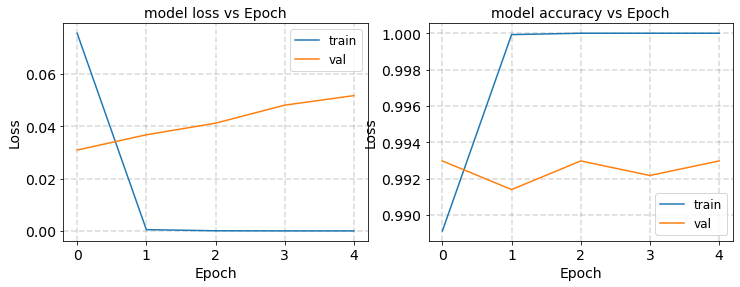

4
Epoch 1/5
1250/1250 - 3s - loss: 0.0767 - accuracy: 0.9902 - val_loss: 0.0392 - val_accuracy: 0.9914
Epoch 2/5
1250/1250 - 3s - loss: 6.8774e-04 - accuracy: 0.9999 - val_loss: 0.0533 - val_accuracy: 0.9898
Epoch 3/5
1250/1250 - 3s - loss: 8.9447e-05 - accuracy: 1.0000 - val_loss: 0.0590 - val_accuracy: 0.9898
Epoch 4/5
1250/1250 - 3s - loss: 2.0832e-05 - accuracy: 1.0000 - val_loss: 0.0673 - val_accuracy: 0.9906
Epoch 5/5
1250/1250 - 3s - loss: 5.6727e-06 - accuracy: 1.0000 - val_loss: 0.0736 - val_accuracy: 0.9906


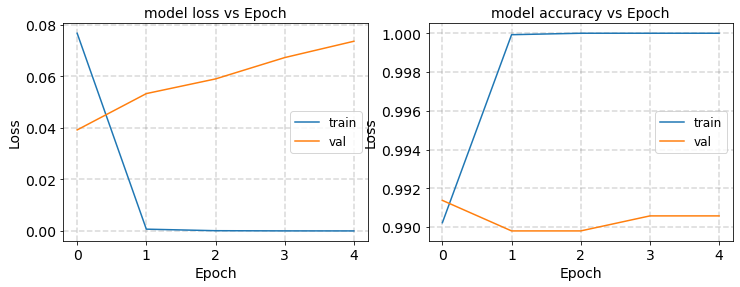

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_flatten_ (None, 784)               1         
_________________________________________________________________
prune_low_magnitude_dense_6  (None, 256)               401666    
_________________________________________________________________
prune_low_magnitude_dense_7  (None, 256)               131330    
_________________________________________________________________
prune_low_magnitude_dense_8  (None, 256)               131330    
_________________________________________________________________
prune_low_magnitude_dense_9  (None, 256)               131330    
_________________________________________________________________
dense_11 (Dense)             (None, 4)                 1028      
Total params: 796,685
Trainable params: 399,364
Non-trainable params: 397,321
__________________________________________

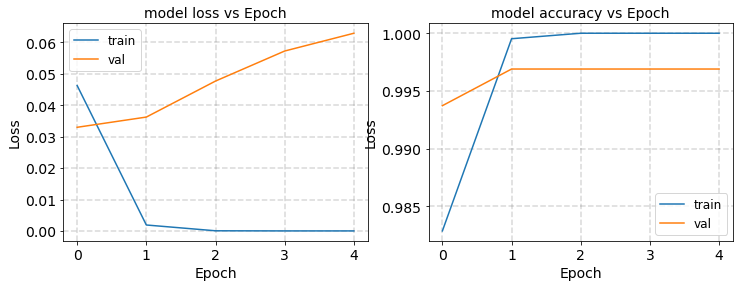

7
Epoch 1/5
1250/1250 - 3s - loss: 0.0553 - accuracy: 0.9898 - val_loss: 0.0344 - val_accuracy: 0.9874
Epoch 2/5
1250/1250 - 3s - loss: 0.0036 - accuracy: 0.9990 - val_loss: 0.0430 - val_accuracy: 0.9890
Epoch 3/5
1250/1250 - 3s - loss: 2.1388e-04 - accuracy: 0.9999 - val_loss: 0.0435 - val_accuracy: 0.9898
Epoch 4/5
1250/1250 - 3s - loss: 1.0559e-05 - accuracy: 1.0000 - val_loss: 0.0530 - val_accuracy: 0.9898
Epoch 5/5
1250/1250 - 3s - loss: 2.6656e-06 - accuracy: 1.0000 - val_loss: 0.0596 - val_accuracy: 0.9898


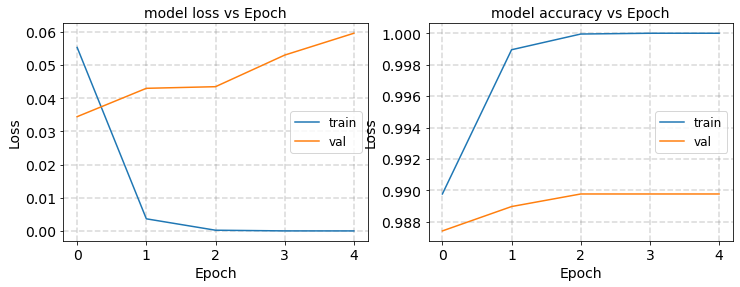

6
Epoch 1/5
1250/1250 - 3s - loss: 0.0753 - accuracy: 0.9888 - val_loss: 0.0378 - val_accuracy: 0.9905
Epoch 2/5
1250/1250 - 3s - loss: 3.3531e-04 - accuracy: 0.9999 - val_loss: 0.0481 - val_accuracy: 0.9937
Epoch 3/5
1250/1250 - 3s - loss: 2.3338e-05 - accuracy: 1.0000 - val_loss: 0.0557 - val_accuracy: 0.9937
Epoch 4/5
1250/1250 - 3s - loss: 7.4968e-06 - accuracy: 1.0000 - val_loss: 0.0607 - val_accuracy: 0.9937
Epoch 5/5
1250/1250 - 3s - loss: 2.9376e-06 - accuracy: 1.0000 - val_loss: 0.0662 - val_accuracy: 0.9937


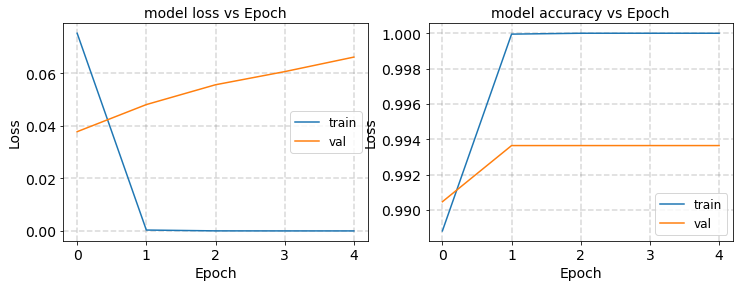

2
Epoch 1/5
1250/1250 - 3s - loss: 0.0775 - accuracy: 0.9842 - val_loss: 0.0343 - val_accuracy: 0.9922
Epoch 2/5
1250/1250 - 3s - loss: 3.2409e-04 - accuracy: 0.9999 - val_loss: 0.0425 - val_accuracy: 0.9930
Epoch 3/5
1250/1250 - 3s - loss: 1.9300e-05 - accuracy: 1.0000 - val_loss: 0.0487 - val_accuracy: 0.9930
Epoch 4/5
1250/1250 - 3s - loss: 5.3283e-06 - accuracy: 1.0000 - val_loss: 0.0551 - val_accuracy: 0.9937
Epoch 5/5
1250/1250 - 3s - loss: 1.6830e-06 - accuracy: 1.0000 - val_loss: 0.0617 - val_accuracy: 0.9930


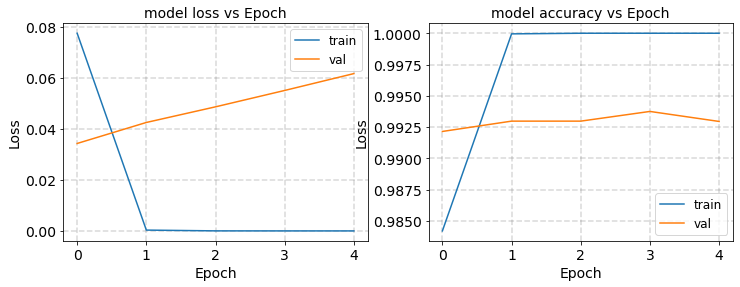

round1 [4 2 6 7]
4
Epoch 1/5
1250/1250 - 3s - loss: 0.0686 - accuracy: 0.9874 - val_loss: 0.0318 - val_accuracy: 0.9906
Epoch 2/5
1250/1250 - 3s - loss: 0.0015 - accuracy: 0.9996 - val_loss: 0.0453 - val_accuracy: 0.9883
Epoch 3/5
1250/1250 - 3s - loss: 9.8483e-05 - accuracy: 1.0000 - val_loss: 0.0508 - val_accuracy: 0.9883
Epoch 4/5
1250/1250 - 3s - loss: 2.3006e-05 - accuracy: 1.0000 - val_loss: 0.0583 - val_accuracy: 0.9883
Epoch 5/5
1250/1250 - 3s - loss: 6.8590e-06 - accuracy: 1.0000 - val_loss: 0.0634 - val_accuracy: 0.9883


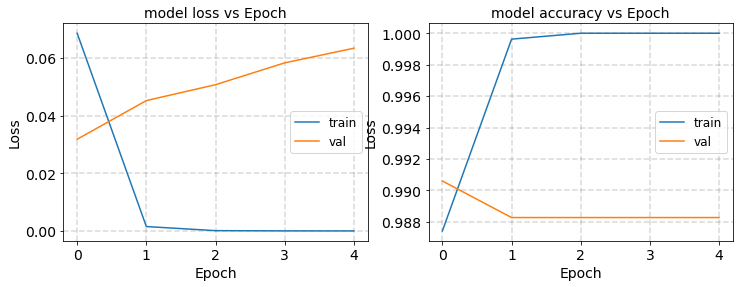

2
Epoch 1/5
1250/1250 - 3s - loss: 0.0616 - accuracy: 0.9914 - val_loss: 0.0351 - val_accuracy: 0.9906
Epoch 2/5
1250/1250 - 3s - loss: 9.6928e-05 - accuracy: 1.0000 - val_loss: 0.0434 - val_accuracy: 0.9906
Epoch 3/5
1250/1250 - 3s - loss: 1.7231e-05 - accuracy: 1.0000 - val_loss: 0.0502 - val_accuracy: 0.9906
Epoch 4/5
1250/1250 - 3s - loss: 4.7141e-06 - accuracy: 1.0000 - val_loss: 0.0570 - val_accuracy: 0.9906
Epoch 5/5
1250/1250 - 3s - loss: 1.3815e-06 - accuracy: 1.0000 - val_loss: 0.0635 - val_accuracy: 0.9898


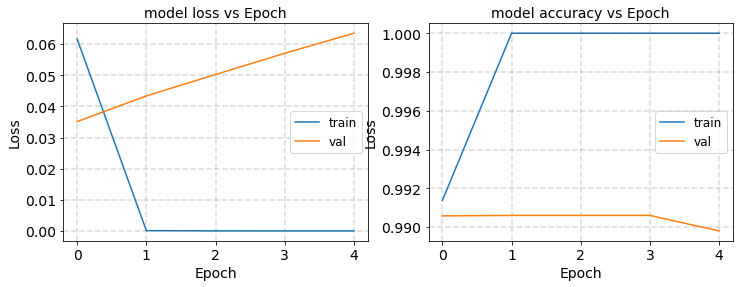

6
Epoch 1/5
1250/1250 - 3s - loss: 0.0705 - accuracy: 0.9908 - val_loss: 0.0289 - val_accuracy: 0.9929
Epoch 2/5
1250/1250 - 3s - loss: 7.3510e-05 - accuracy: 1.0000 - val_loss: 0.0353 - val_accuracy: 0.9929
Epoch 3/5
1250/1250 - 3s - loss: 1.3976e-05 - accuracy: 1.0000 - val_loss: 0.0414 - val_accuracy: 0.9929
Epoch 4/5
1250/1250 - 3s - loss: 3.9121e-06 - accuracy: 1.0000 - val_loss: 0.0463 - val_accuracy: 0.9937
Epoch 5/5
1250/1250 - 3s - loss: 1.3737e-06 - accuracy: 1.0000 - val_loss: 0.0523 - val_accuracy: 0.9937


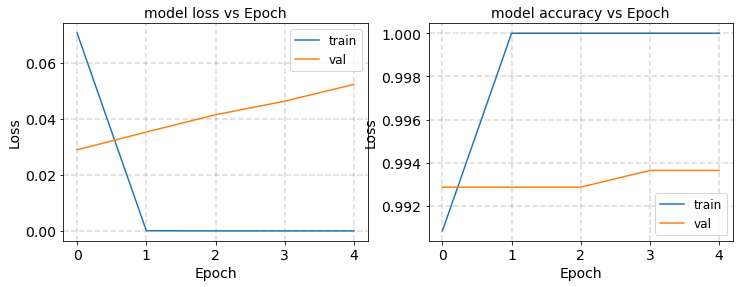

7
Epoch 1/5
1250/1250 - 3s - loss: 0.0818 - accuracy: 0.9936 - val_loss: 0.0370 - val_accuracy: 0.9906
Epoch 2/5
1250/1250 - 3s - loss: 1.0067e-04 - accuracy: 1.0000 - val_loss: 0.0430 - val_accuracy: 0.9913
Epoch 3/5
1250/1250 - 3s - loss: 1.7912e-05 - accuracy: 1.0000 - val_loss: 0.0506 - val_accuracy: 0.9913
Epoch 4/5
1250/1250 - 3s - loss: 2.9108e-06 - accuracy: 1.0000 - val_loss: 0.0623 - val_accuracy: 0.9913
Epoch 5/5
1250/1250 - 3s - loss: 7.0346e-07 - accuracy: 1.0000 - val_loss: 0.0702 - val_accuracy: 0.9913


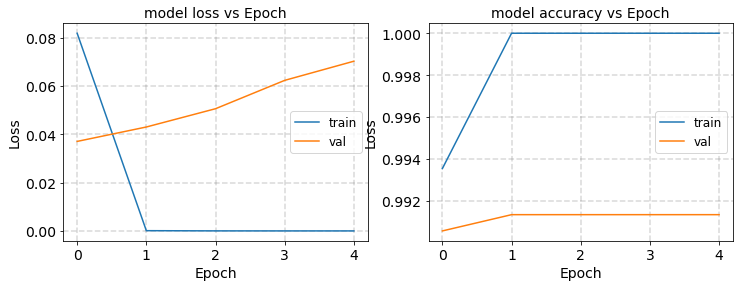

round2 [6 4 2 7]
6
Epoch 1/5
1250/1250 - 3s - loss: 0.0771 - accuracy: 0.9905 - val_loss: 0.0414 - val_accuracy: 0.9928
Epoch 2/5
1250/1250 - 3s - loss: 8.1900e-05 - accuracy: 1.0000 - val_loss: 0.0479 - val_accuracy: 0.9936
Epoch 3/5
1250/1250 - 3s - loss: 1.7687e-05 - accuracy: 1.0000 - val_loss: 0.0529 - val_accuracy: 0.9928
Epoch 4/5
1250/1250 - 3s - loss: 6.3735e-06 - accuracy: 1.0000 - val_loss: 0.0566 - val_accuracy: 0.9928
Epoch 5/5
1250/1250 - 3s - loss: 2.6105e-06 - accuracy: 1.0000 - val_loss: 0.0605 - val_accuracy: 0.9928


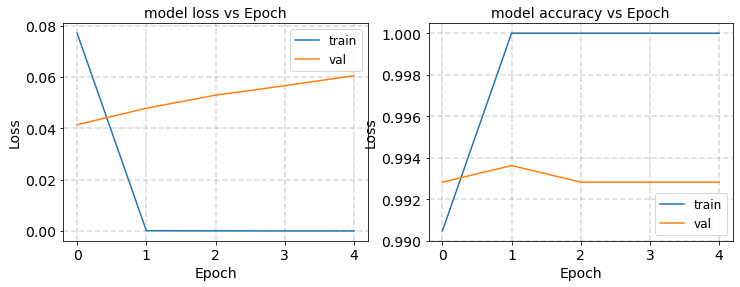

4
Epoch 1/5
1250/1250 - 3s - loss: 0.0765 - accuracy: 0.9867 - val_loss: 0.0385 - val_accuracy: 0.9913
Epoch 2/5
1250/1250 - 3s - loss: 3.9349e-04 - accuracy: 1.0000 - val_loss: 0.0491 - val_accuracy: 0.9906
Epoch 3/5
1250/1250 - 3s - loss: 5.8353e-05 - accuracy: 1.0000 - val_loss: 0.0589 - val_accuracy: 0.9914
Epoch 4/5
1250/1250 - 3s - loss: 1.5061e-05 - accuracy: 1.0000 - val_loss: 0.0673 - val_accuracy: 0.9914
Epoch 5/5
1250/1250 - 3s - loss: 4.9193e-06 - accuracy: 1.0000 - val_loss: 0.0750 - val_accuracy: 0.9914


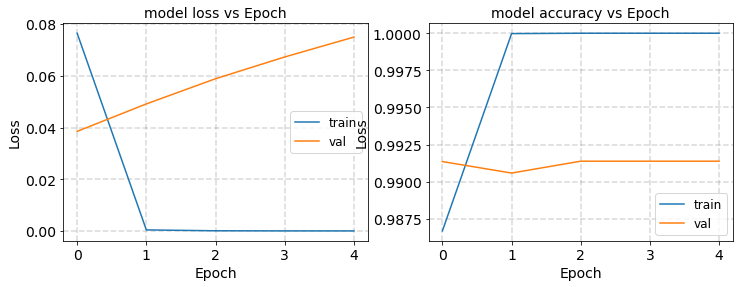

2
Epoch 1/5
1250/1250 - 3s - loss: 0.0797 - accuracy: 0.9910 - val_loss: 0.0434 - val_accuracy: 0.9937
Epoch 2/5
1250/1250 - 3s - loss: 1.0133e-04 - accuracy: 1.0000 - val_loss: 0.0520 - val_accuracy: 0.9937
Epoch 3/5
1250/1250 - 3s - loss: 1.2728e-05 - accuracy: 1.0000 - val_loss: 0.0612 - val_accuracy: 0.9930
Epoch 4/5
1250/1250 - 3s - loss: 2.1347e-06 - accuracy: 1.0000 - val_loss: 0.0706 - val_accuracy: 0.9930
Epoch 5/5
1250/1250 - 3s - loss: 6.3442e-07 - accuracy: 1.0000 - val_loss: 0.0775 - val_accuracy: 0.9930


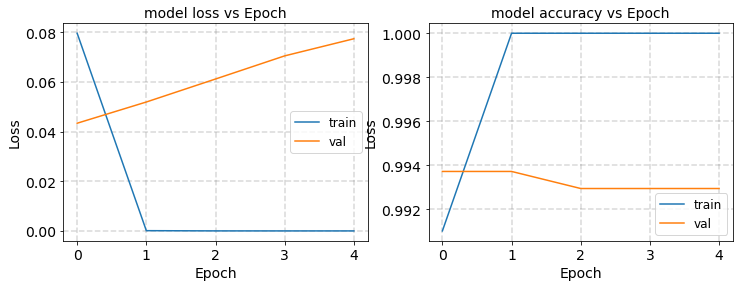

7
Epoch 1/5
1250/1250 - 3s - loss: 0.0735 - accuracy: 0.9923 - val_loss: 0.0379 - val_accuracy: 0.9914
Epoch 2/5
1250/1250 - 3s - loss: 3.7323e-04 - accuracy: 1.0000 - val_loss: 0.0418 - val_accuracy: 0.9929
Epoch 3/5
1250/1250 - 3s - loss: 6.4955e-05 - accuracy: 1.0000 - val_loss: 0.0433 - val_accuracy: 0.9921
Epoch 4/5
1250/1250 - 3s - loss: 1.9632e-05 - accuracy: 1.0000 - val_loss: 0.0491 - val_accuracy: 0.9929
Epoch 5/5
1250/1250 - 3s - loss: 6.5177e-06 - accuracy: 1.0000 - val_loss: 0.0545 - val_accuracy: 0.9921


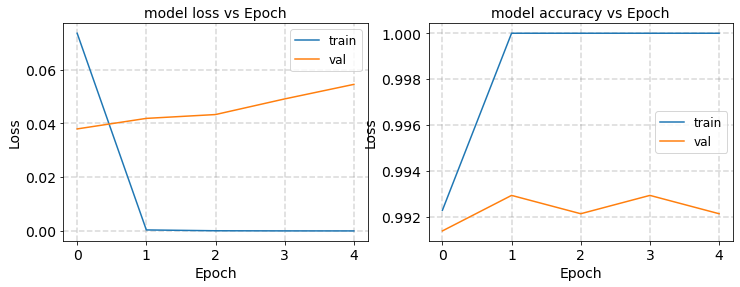

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_flatten_ (None, 784)               1         
_________________________________________________________________
prune_low_magnitude_dense_12 (None, 256)               401666    
_________________________________________________________________
prune_low_magnitude_dense_13 (None, 256)               131330    
_________________________________________________________________
prune_low_magnitude_dense_14 (None, 256)               131330    
_________________________________________________________________
prune_low_magnitude_dense_15 (None, 256)               131330    
_________________________________________________________________
dense_17 (Dense)             (None, 4)                 1028      
Total params: 796,685
Trainable params: 399,364
Non-trainable params: 397,321
__________________________________________

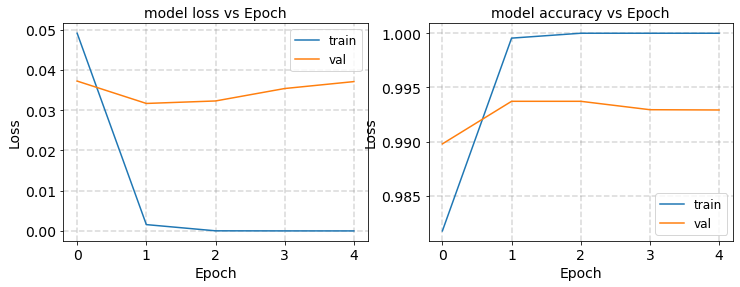

7
Epoch 1/5
1250/1250 - 3s - loss: 0.0540 - accuracy: 0.9897 - val_loss: 0.0426 - val_accuracy: 0.9867
Epoch 2/5
1250/1250 - 3s - loss: 0.0035 - accuracy: 0.9989 - val_loss: 0.0385 - val_accuracy: 0.9922
Epoch 3/5
1250/1250 - 3s - loss: 7.2759e-05 - accuracy: 1.0000 - val_loss: 0.0417 - val_accuracy: 0.9922
Epoch 4/5
1250/1250 - 3s - loss: 1.3174e-05 - accuracy: 1.0000 - val_loss: 0.0457 - val_accuracy: 0.9930
Epoch 5/5
1250/1250 - 3s - loss: 4.6397e-06 - accuracy: 1.0000 - val_loss: 0.0488 - val_accuracy: 0.9930


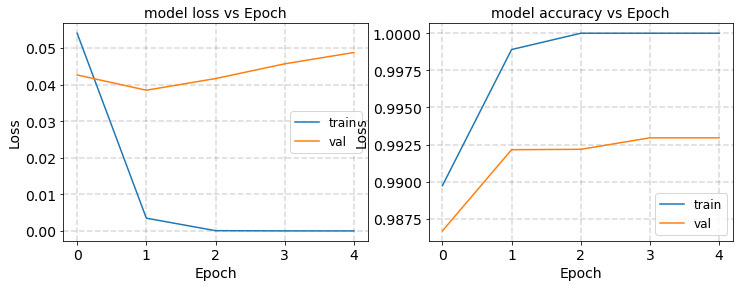

2
Epoch 1/5
1250/1250 - 3s - loss: 0.0907 - accuracy: 0.9855 - val_loss: 0.0488 - val_accuracy: 0.9883
Epoch 2/5
1250/1250 - 3s - loss: 0.0015 - accuracy: 0.9997 - val_loss: 0.0558 - val_accuracy: 0.9890
Epoch 3/5
1250/1250 - 3s - loss: 4.0320e-05 - accuracy: 1.0000 - val_loss: 0.0692 - val_accuracy: 0.9906
Epoch 4/5
1250/1250 - 3s - loss: 7.1955e-06 - accuracy: 1.0000 - val_loss: 0.0785 - val_accuracy: 0.9906
Epoch 5/5
1250/1250 - 3s - loss: 2.3688e-06 - accuracy: 1.0000 - val_loss: 0.0851 - val_accuracy: 0.9898


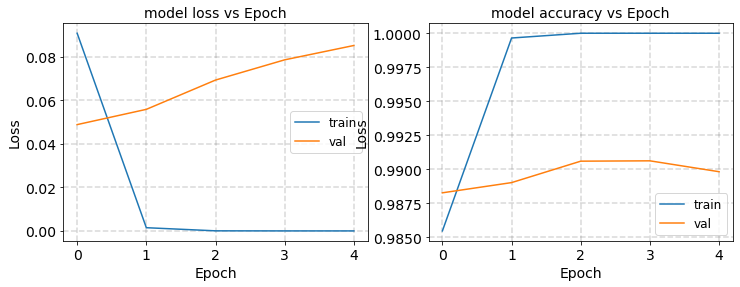

6
Epoch 1/5
1250/1250 - 3s - loss: 0.0656 - accuracy: 0.9908 - val_loss: 0.0356 - val_accuracy: 0.9913
Epoch 2/5
1250/1250 - 3s - loss: 9.4612e-05 - accuracy: 1.0000 - val_loss: 0.0424 - val_accuracy: 0.9913
Epoch 3/5
1250/1250 - 3s - loss: 1.3195e-05 - accuracy: 1.0000 - val_loss: 0.0486 - val_accuracy: 0.9913
Epoch 4/5
1250/1250 - 3s - loss: 3.4895e-06 - accuracy: 1.0000 - val_loss: 0.0537 - val_accuracy: 0.9929
Epoch 5/5
1250/1250 - 3s - loss: 1.1738e-06 - accuracy: 1.0000 - val_loss: 0.0573 - val_accuracy: 0.9929


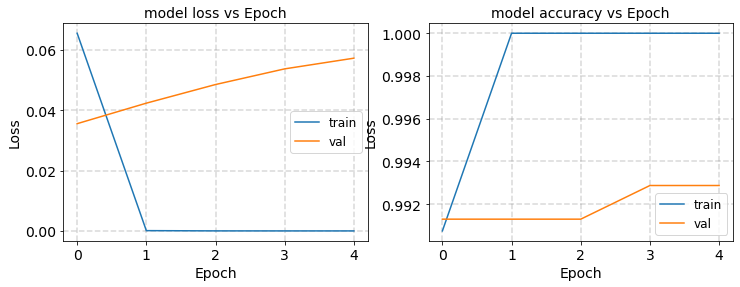

round1 [7 6 4 2]
7
Epoch 1/5
1250/1250 - 3s - loss: 0.0981 - accuracy: 0.9876 - val_loss: 0.0340 - val_accuracy: 0.9898
Epoch 2/5
1250/1250 - 3s - loss: 0.0016 - accuracy: 0.9996 - val_loss: 0.0419 - val_accuracy: 0.9890
Epoch 3/5
1250/1250 - 3s - loss: 6.2355e-05 - accuracy: 1.0000 - val_loss: 0.0490 - val_accuracy: 0.9890
Epoch 4/5
1250/1250 - 3s - loss: 1.2424e-05 - accuracy: 1.0000 - val_loss: 0.0551 - val_accuracy: 0.9890
Epoch 5/5
1250/1250 - 3s - loss: 3.5595e-06 - accuracy: 1.0000 - val_loss: 0.0612 - val_accuracy: 0.9882


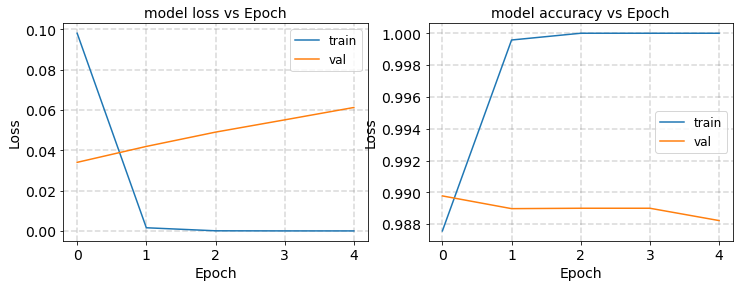

6
Epoch 1/5
1250/1250 - 3s - loss: 0.0679 - accuracy: 0.9919 - val_loss: 0.0348 - val_accuracy: 0.9937
Epoch 2/5
1250/1250 - 3s - loss: 3.9016e-05 - accuracy: 1.0000 - val_loss: 0.0413 - val_accuracy: 0.9937
Epoch 3/5
1250/1250 - 3s - loss: 1.0022e-05 - accuracy: 1.0000 - val_loss: 0.0454 - val_accuracy: 0.9937
Epoch 4/5
1250/1250 - 3s - loss: 3.1259e-06 - accuracy: 1.0000 - val_loss: 0.0540 - val_accuracy: 0.9937
Epoch 5/5
1250/1250 - 3s - loss: 7.7479e-07 - accuracy: 1.0000 - val_loss: 0.0627 - val_accuracy: 0.9937


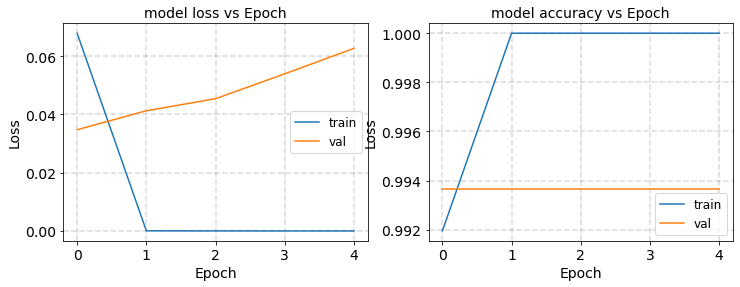

4
Epoch 1/5
1250/1250 - 3s - loss: 0.0822 - accuracy: 0.9901 - val_loss: 0.0360 - val_accuracy: 0.9914
Epoch 2/5
1250/1250 - 3s - loss: 3.1868e-04 - accuracy: 0.9999 - val_loss: 0.0483 - val_accuracy: 0.9922
Epoch 3/5
1250/1250 - 3s - loss: 3.1979e-05 - accuracy: 1.0000 - val_loss: 0.0561 - val_accuracy: 0.9922
Epoch 4/5
1250/1250 - 3s - loss: 9.5006e-06 - accuracy: 1.0000 - val_loss: 0.0615 - val_accuracy: 0.9922
Epoch 5/5
1250/1250 - 3s - loss: 3.4972e-06 - accuracy: 1.0000 - val_loss: 0.0683 - val_accuracy: 0.9922


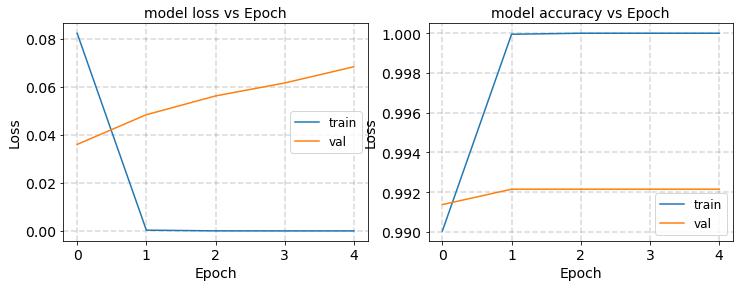

2
Epoch 1/5
1250/1250 - 3s - loss: 0.0676 - accuracy: 0.9922 - val_loss: 0.0587 - val_accuracy: 0.9882
Epoch 2/5
1250/1250 - 3s - loss: 7.1929e-05 - accuracy: 1.0000 - val_loss: 0.0669 - val_accuracy: 0.9890
Epoch 3/5
1250/1250 - 3s - loss: 1.4911e-05 - accuracy: 1.0000 - val_loss: 0.0742 - val_accuracy: 0.9906
Epoch 4/5
1250/1250 - 3s - loss: 5.4951e-06 - accuracy: 1.0000 - val_loss: 0.0802 - val_accuracy: 0.9914
Epoch 5/5
1250/1250 - 3s - loss: 2.2322e-06 - accuracy: 1.0000 - val_loss: 0.0857 - val_accuracy: 0.9914


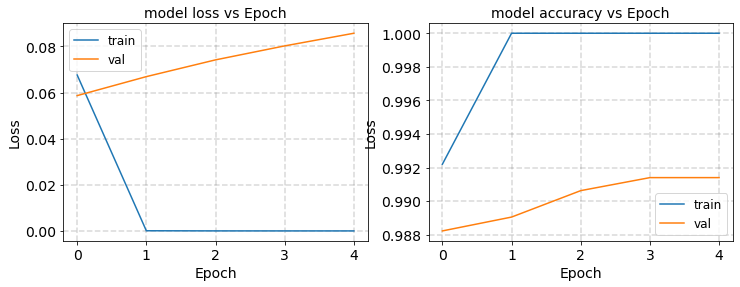

round2 [6 2 7 4]
6
Epoch 1/5
1250/1250 - 3s - loss: 0.0741 - accuracy: 0.9894 - val_loss: 0.0417 - val_accuracy: 0.9905
Epoch 2/5
1250/1250 - 3s - loss: 1.1449e-04 - accuracy: 1.0000 - val_loss: 0.0450 - val_accuracy: 0.9913
Epoch 3/5
1250/1250 - 3s - loss: 1.8068e-05 - accuracy: 1.0000 - val_loss: 0.0500 - val_accuracy: 0.9913
Epoch 4/5
1250/1250 - 3s - loss: 5.6473e-06 - accuracy: 1.0000 - val_loss: 0.0534 - val_accuracy: 0.9913
Epoch 5/5
1250/1250 - 3s - loss: 2.3327e-06 - accuracy: 1.0000 - val_loss: 0.0564 - val_accuracy: 0.9913


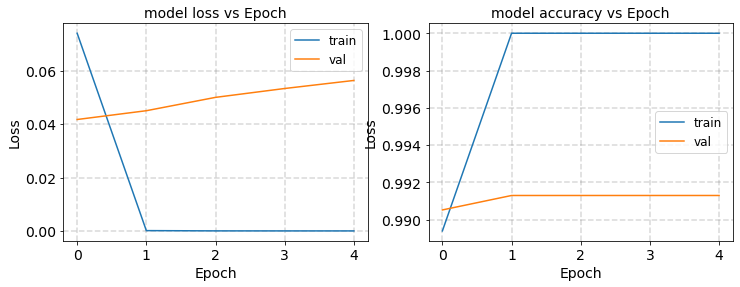

2
Epoch 1/5
1250/1250 - 3s - loss: 0.0780 - accuracy: 0.9898 - val_loss: 0.0500 - val_accuracy: 0.9906
Epoch 2/5
1250/1250 - 3s - loss: 6.9182e-05 - accuracy: 1.0000 - val_loss: 0.0640 - val_accuracy: 0.9914
Epoch 3/5
1250/1250 - 3s - loss: 1.3248e-05 - accuracy: 1.0000 - val_loss: 0.0745 - val_accuracy: 0.9914
Epoch 4/5
1250/1250 - 3s - loss: 3.8905e-06 - accuracy: 1.0000 - val_loss: 0.0844 - val_accuracy: 0.9922
Epoch 5/5
1250/1250 - 3s - loss: 1.3216e-06 - accuracy: 1.0000 - val_loss: 0.0945 - val_accuracy: 0.9922


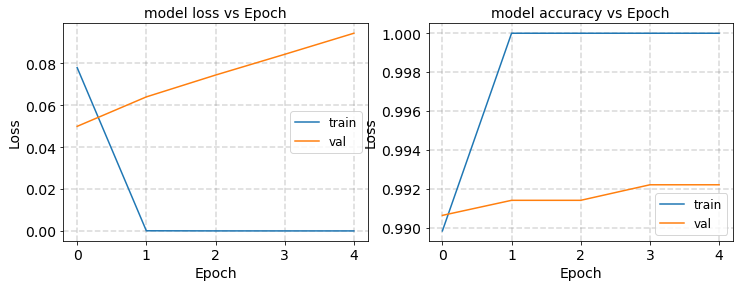

7
Epoch 1/5
1250/1250 - 3s - loss: 0.0760 - accuracy: 0.9924 - val_loss: 0.0238 - val_accuracy: 0.9945
Epoch 2/5
1250/1250 - 3s - loss: 8.6584e-04 - accuracy: 0.9998 - val_loss: 0.0326 - val_accuracy: 0.9930
Epoch 3/5
1250/1250 - 3s - loss: 9.2434e-05 - accuracy: 1.0000 - val_loss: 0.0393 - val_accuracy: 0.9930
Epoch 4/5
1250/1250 - 3s - loss: 2.3182e-05 - accuracy: 1.0000 - val_loss: 0.0448 - val_accuracy: 0.9937
Epoch 5/5
1250/1250 - 3s - loss: 8.1982e-06 - accuracy: 1.0000 - val_loss: 0.0492 - val_accuracy: 0.9937


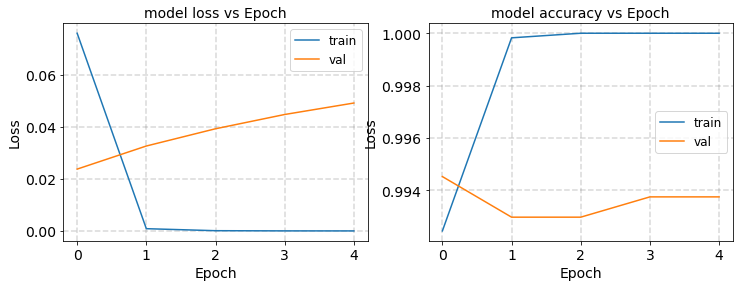

4
Epoch 1/5
1250/1250 - 3s - loss: 0.0715 - accuracy: 0.9907 - val_loss: 0.0347 - val_accuracy: 0.9937
Epoch 2/5
1250/1250 - 3s - loss: 6.3251e-04 - accuracy: 0.9999 - val_loss: 0.0417 - val_accuracy: 0.9922
Epoch 3/5
1250/1250 - 3s - loss: 7.7987e-05 - accuracy: 1.0000 - val_loss: 0.0490 - val_accuracy: 0.9937
Epoch 4/5
1250/1250 - 3s - loss: 1.8209e-05 - accuracy: 1.0000 - val_loss: 0.0542 - val_accuracy: 0.9937
Epoch 5/5
1250/1250 - 3s - loss: 6.9547e-06 - accuracy: 1.0000 - val_loss: 0.0586 - val_accuracy: 0.9945


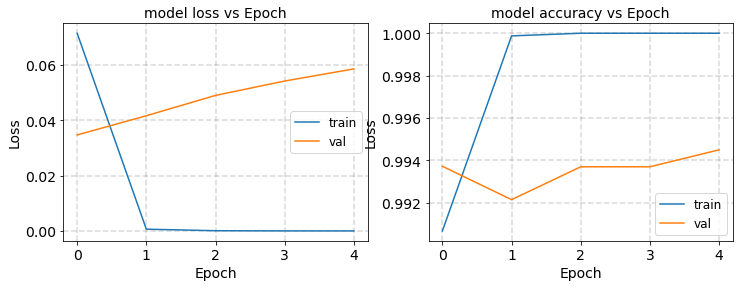

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_flatten_ (None, 784)               1         
_________________________________________________________________
prune_low_magnitude_dense_18 (None, 256)               401666    
_________________________________________________________________
prune_low_magnitude_dense_19 (None, 256)               131330    
_________________________________________________________________
prune_low_magnitude_dense_20 (None, 256)               131330    
_________________________________________________________________
prune_low_magnitude_dense_21 (None, 256)               131330    
_________________________________________________________________
dense_23 (Dense)             (None, 4)                 1028      
Total params: 796,685
Trainable params: 399,364
Non-trainable params: 397,321
__________________________________________

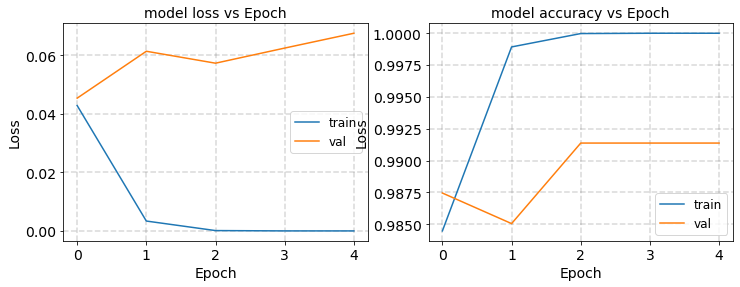

4
Epoch 1/5
1250/1250 - 3s - loss: 0.0610 - accuracy: 0.9851 - val_loss: 0.0287 - val_accuracy: 0.9937
Epoch 2/5
1250/1250 - 3s - loss: 0.0016 - accuracy: 0.9997 - val_loss: 0.0384 - val_accuracy: 0.9922
Epoch 3/5
1250/1250 - 3s - loss: 8.5286e-05 - accuracy: 1.0000 - val_loss: 0.0520 - val_accuracy: 0.9906
Epoch 4/5
1250/1250 - 3s - loss: 7.7667e-06 - accuracy: 1.0000 - val_loss: 0.0581 - val_accuracy: 0.9913
Epoch 5/5
1250/1250 - 3s - loss: 2.3143e-06 - accuracy: 1.0000 - val_loss: 0.0644 - val_accuracy: 0.9913


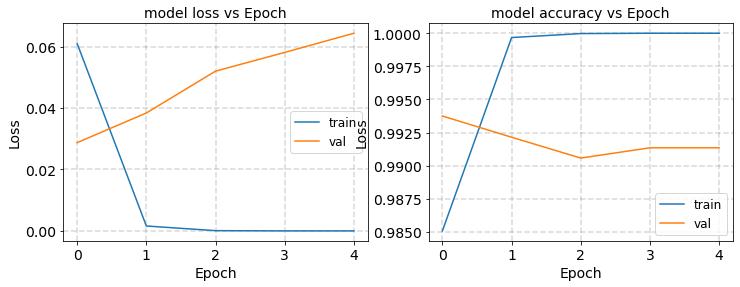

6
Epoch 1/5
1250/1250 - 3s - loss: 0.0559 - accuracy: 0.9928 - val_loss: 0.0324 - val_accuracy: 0.9921
Epoch 2/5
1250/1250 - 3s - loss: 5.0222e-04 - accuracy: 0.9999 - val_loss: 0.0409 - val_accuracy: 0.9921
Epoch 3/5
1250/1250 - 3s - loss: 2.6159e-05 - accuracy: 1.0000 - val_loss: 0.0467 - val_accuracy: 0.9921
Epoch 4/5
1250/1250 - 3s - loss: 7.9503e-06 - accuracy: 1.0000 - val_loss: 0.0522 - val_accuracy: 0.9929
Epoch 5/5
1250/1250 - 3s - loss: 2.7998e-06 - accuracy: 1.0000 - val_loss: 0.0567 - val_accuracy: 0.9929


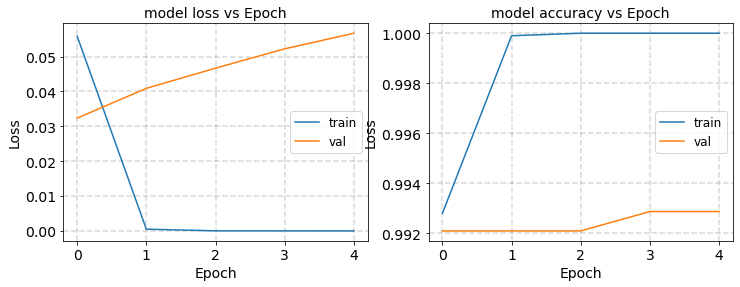

7
Epoch 1/5
1250/1250 - 3s - loss: 0.0738 - accuracy: 0.9902 - val_loss: 0.0306 - val_accuracy: 0.9914
Epoch 2/5
1250/1250 - 3s - loss: 0.0016 - accuracy: 0.9996 - val_loss: 0.0442 - val_accuracy: 0.9929
Epoch 3/5
1250/1250 - 3s - loss: 4.5441e-05 - accuracy: 1.0000 - val_loss: 0.0583 - val_accuracy: 0.9929
Epoch 4/5
1250/1250 - 3s - loss: 6.7424e-06 - accuracy: 1.0000 - val_loss: 0.0656 - val_accuracy: 0.9929
Epoch 5/5
1250/1250 - 3s - loss: 2.4037e-06 - accuracy: 1.0000 - val_loss: 0.0713 - val_accuracy: 0.9929


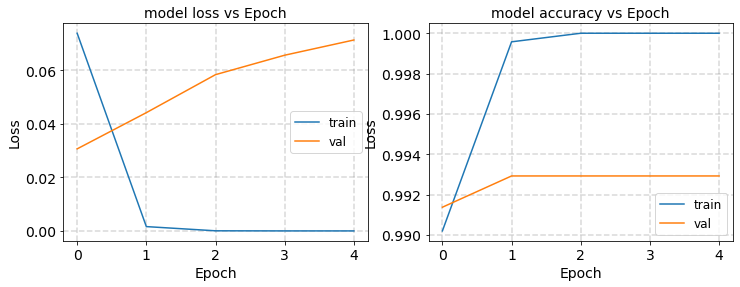

round1 [6 2 4 7]
6
Epoch 1/5
1250/1250 - 3s - loss: 0.0667 - accuracy: 0.9905 - val_loss: 0.0364 - val_accuracy: 0.9937
Epoch 2/5
1250/1250 - 3s - loss: 2.6045e-05 - accuracy: 1.0000 - val_loss: 0.0461 - val_accuracy: 0.9937
Epoch 3/5
1250/1250 - 3s - loss: 4.6150e-06 - accuracy: 1.0000 - val_loss: 0.0519 - val_accuracy: 0.9937
Epoch 4/5
1250/1250 - 3s - loss: 1.5192e-06 - accuracy: 1.0000 - val_loss: 0.0572 - val_accuracy: 0.9937
Epoch 5/5
1250/1250 - 3s - loss: 5.8838e-07 - accuracy: 1.0000 - val_loss: 0.0620 - val_accuracy: 0.9937


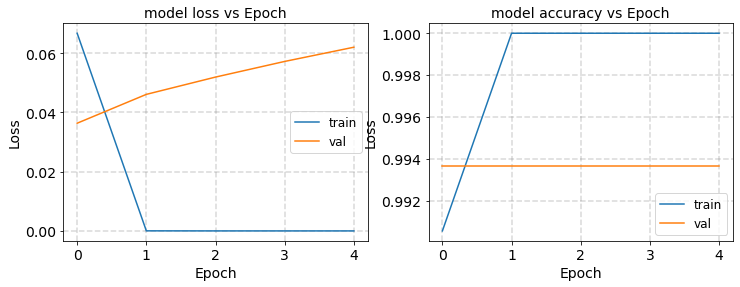

2
Epoch 1/5
1250/1250 - 3s - loss: 0.0891 - accuracy: 0.9882 - val_loss: 0.0399 - val_accuracy: 0.9922
Epoch 2/5
1250/1250 - 3s - loss: 2.4335e-04 - accuracy: 1.0000 - val_loss: 0.0450 - val_accuracy: 0.9906
Epoch 3/5
1250/1250 - 3s - loss: 3.5316e-05 - accuracy: 1.0000 - val_loss: 0.0511 - val_accuracy: 0.9906
Epoch 4/5
1250/1250 - 3s - loss: 1.2167e-05 - accuracy: 1.0000 - val_loss: 0.0560 - val_accuracy: 0.9914
Epoch 5/5
1250/1250 - 3s - loss: 4.6265e-06 - accuracy: 1.0000 - val_loss: 0.0617 - val_accuracy: 0.9906


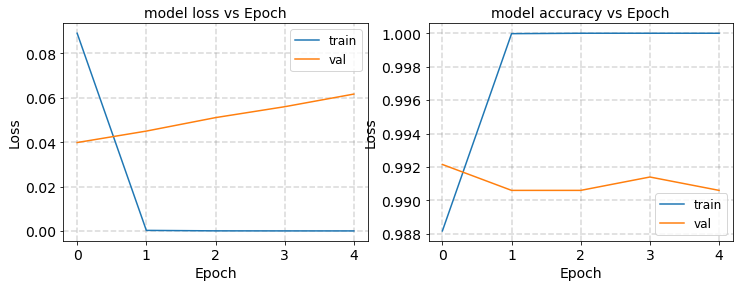

4
Epoch 1/5
1250/1250 - 3s - loss: 0.0783 - accuracy: 0.9877 - val_loss: 0.0351 - val_accuracy: 0.9922
Epoch 2/5
1250/1250 - 3s - loss: 6.4330e-04 - accuracy: 0.9999 - val_loss: 0.0506 - val_accuracy: 0.9914
Epoch 3/5
1250/1250 - 3s - loss: 3.7789e-05 - accuracy: 1.0000 - val_loss: 0.0592 - val_accuracy: 0.9914
Epoch 4/5
1250/1250 - 3s - loss: 1.0785e-05 - accuracy: 1.0000 - val_loss: 0.0672 - val_accuracy: 0.9898
Epoch 5/5
1250/1250 - 3s - loss: 3.9561e-06 - accuracy: 1.0000 - val_loss: 0.0742 - val_accuracy: 0.9890


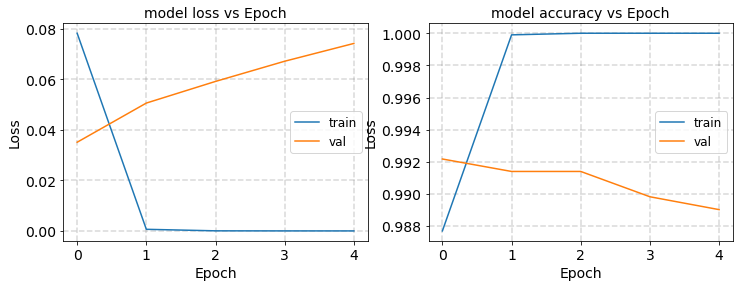

7
Epoch 1/5
1250/1250 - 3s - loss: 0.0750 - accuracy: 0.9913 - val_loss: 0.0307 - val_accuracy: 0.9953
Epoch 2/5
1250/1250 - 3s - loss: 2.5460e-04 - accuracy: 0.9999 - val_loss: 0.0375 - val_accuracy: 0.9930
Epoch 3/5
1250/1250 - 3s - loss: 3.3036e-05 - accuracy: 1.0000 - val_loss: 0.0421 - val_accuracy: 0.9937
Epoch 4/5
1250/1250 - 3s - loss: 1.1318e-05 - accuracy: 1.0000 - val_loss: 0.0447 - val_accuracy: 0.9930
Epoch 5/5
1250/1250 - 3s - loss: 4.4127e-06 - accuracy: 1.0000 - val_loss: 0.0477 - val_accuracy: 0.9937


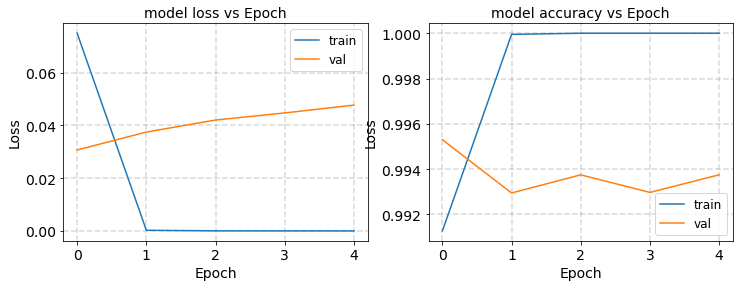

round2 [7 6 2 4]
7
Epoch 1/5
1250/1250 - 3s - loss: 1.7599e-06 - accuracy: 1.0000 - val_loss: 0.0506 - val_accuracy: 0.9930
Epoch 2/5
1250/1250 - 3s - loss: 7.4202e-07 - accuracy: 1.0000 - val_loss: 0.0539 - val_accuracy: 0.9930
Epoch 3/5
1250/1250 - 3s - loss: 3.2475e-07 - accuracy: 1.0000 - val_loss: 0.0577 - val_accuracy: 0.9930
Epoch 4/5
1250/1250 - 3s - loss: 1.4262e-07 - accuracy: 1.0000 - val_loss: 0.0606 - val_accuracy: 0.9930
Epoch 5/5
1250/1250 - 3s - loss: 6.4717e-08 - accuracy: 1.0000 - val_loss: 0.0643 - val_accuracy: 0.9922


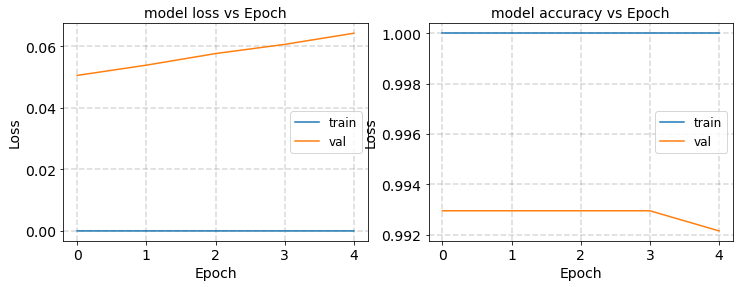

6
Epoch 1/5
1250/1250 - 3s - loss: 0.0620 - accuracy: 0.9954 - val_loss: 0.0524 - val_accuracy: 0.9929
Epoch 2/5
1250/1250 - 3s - loss: 5.5808e-05 - accuracy: 1.0000 - val_loss: 0.0622 - val_accuracy: 0.9929
Epoch 3/5
1250/1250 - 3s - loss: 8.6369e-06 - accuracy: 1.0000 - val_loss: 0.0708 - val_accuracy: 0.9929
Epoch 4/5
1250/1250 - 3s - loss: 2.5709e-06 - accuracy: 1.0000 - val_loss: 0.0804 - val_accuracy: 0.9937
Epoch 5/5
1250/1250 - 3s - loss: 8.5765e-07 - accuracy: 1.0000 - val_loss: 0.0863 - val_accuracy: 0.9937


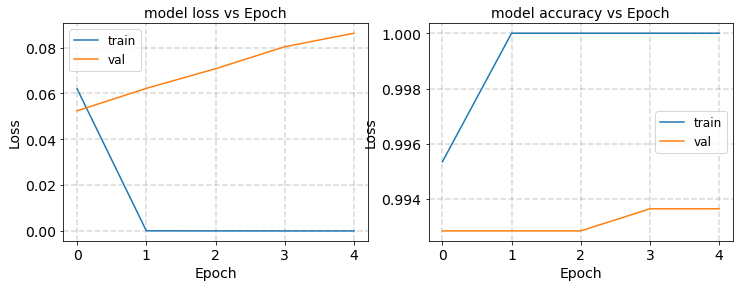

2
Epoch 1/5
1250/1250 - 3s - loss: 0.1069 - accuracy: 0.9872 - val_loss: 0.0489 - val_accuracy: 0.9898
Epoch 2/5
1250/1250 - 3s - loss: 2.2732e-04 - accuracy: 1.0000 - val_loss: 0.0540 - val_accuracy: 0.9898
Epoch 3/5
1250/1250 - 3s - loss: 3.7312e-05 - accuracy: 1.0000 - val_loss: 0.0612 - val_accuracy: 0.9898
Epoch 4/5
1250/1250 - 3s - loss: 1.0506e-05 - accuracy: 1.0000 - val_loss: 0.0681 - val_accuracy: 0.9906
Epoch 5/5
1250/1250 - 3s - loss: 4.0045e-06 - accuracy: 1.0000 - val_loss: 0.0718 - val_accuracy: 0.9898


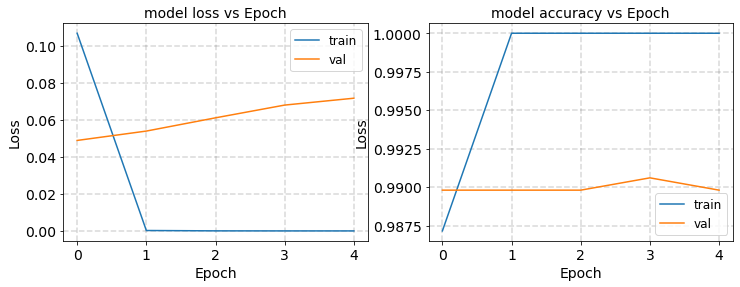

4
Epoch 1/5
1250/1250 - 3s - loss: 0.0575 - accuracy: 0.9927 - val_loss: 0.0517 - val_accuracy: 0.9891
Epoch 2/5
1250/1250 - 3s - loss: 1.0455e-04 - accuracy: 1.0000 - val_loss: 0.0670 - val_accuracy: 0.9898
Epoch 3/5
1250/1250 - 3s - loss: 1.5138e-05 - accuracy: 1.0000 - val_loss: 0.0773 - val_accuracy: 0.9898
Epoch 4/5
1250/1250 - 3s - loss: 4.8939e-06 - accuracy: 1.0000 - val_loss: 0.0846 - val_accuracy: 0.9898
Epoch 5/5
1250/1250 - 3s - loss: 2.1018e-06 - accuracy: 1.0000 - val_loss: 0.0902 - val_accuracy: 0.9890


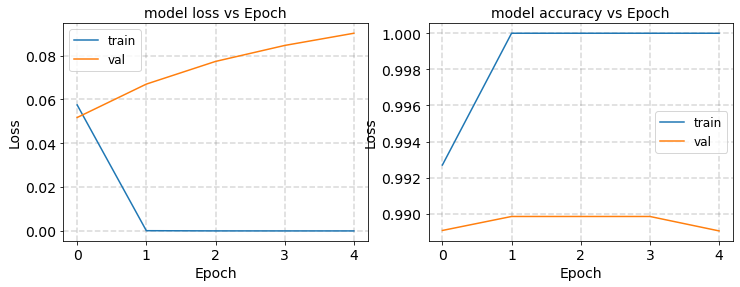

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_flatten_ (None, 784)               1         
_________________________________________________________________
prune_low_magnitude_dense_24 (None, 256)               401666    
_________________________________________________________________
prune_low_magnitude_dense_25 (None, 256)               131330    
_________________________________________________________________
prune_low_magnitude_dense_26 (None, 256)               131330    
_________________________________________________________________
prune_low_magnitude_dense_27 (None, 256)               131330    
_________________________________________________________________
dense_29 (Dense)             (None, 4)                 1028      
Total params: 796,685
Trainable params: 399,364
Non-trainable params: 397,321
__________________________________________

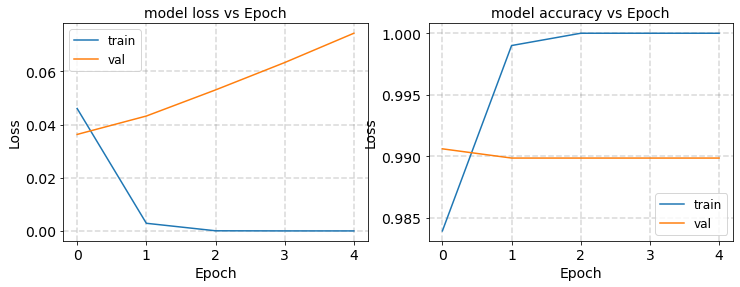

4
Epoch 1/5
1250/1250 - 3s - loss: 0.0724 - accuracy: 0.9854 - val_loss: 0.0445 - val_accuracy: 0.9875
Epoch 2/5
1250/1250 - 3s - loss: 0.0025 - accuracy: 0.9994 - val_loss: 0.0483 - val_accuracy: 0.9922
Epoch 3/5
1250/1250 - 3s - loss: 1.5029e-04 - accuracy: 1.0000 - val_loss: 0.0534 - val_accuracy: 0.9930
Epoch 4/5
1250/1250 - 3s - loss: 1.8236e-05 - accuracy: 1.0000 - val_loss: 0.0597 - val_accuracy: 0.9930
Epoch 5/5
1250/1250 - 3s - loss: 6.9370e-06 - accuracy: 1.0000 - val_loss: 0.0654 - val_accuracy: 0.9930


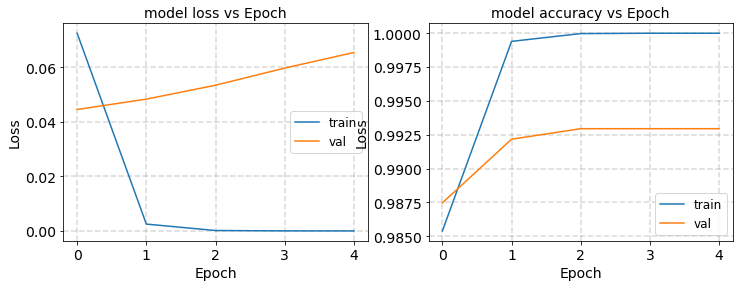

6
Epoch 1/5
1250/1250 - 3s - loss: 0.0419 - accuracy: 0.9936 - val_loss: 0.0274 - val_accuracy: 0.9929
Epoch 2/5
1250/1250 - 3s - loss: 4.7606e-04 - accuracy: 0.9998 - val_loss: 0.0333 - val_accuracy: 0.9929
Epoch 3/5
1250/1250 - 3s - loss: 1.7956e-05 - accuracy: 1.0000 - val_loss: 0.0375 - val_accuracy: 0.9929
Epoch 4/5
1250/1250 - 3s - loss: 7.4113e-06 - accuracy: 1.0000 - val_loss: 0.0407 - val_accuracy: 0.9929
Epoch 5/5
1250/1250 - 3s - loss: 3.2470e-06 - accuracy: 1.0000 - val_loss: 0.0442 - val_accuracy: 0.9929


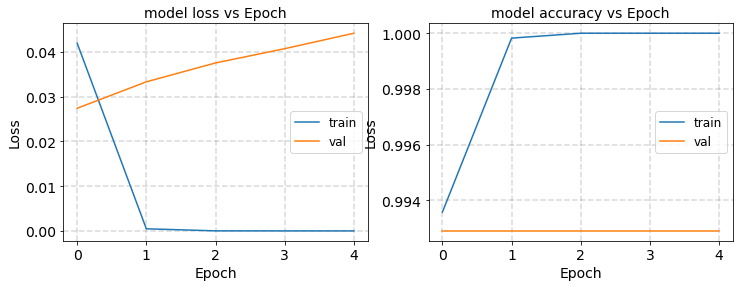

7
Epoch 1/5
1250/1250 - 3s - loss: 0.0692 - accuracy: 0.9916 - val_loss: 0.0269 - val_accuracy: 0.9898
Epoch 2/5
1250/1250 - 3s - loss: 4.2538e-04 - accuracy: 0.9999 - val_loss: 0.0295 - val_accuracy: 0.9914
Epoch 3/5
1250/1250 - 3s - loss: 2.3836e-05 - accuracy: 1.0000 - val_loss: 0.0346 - val_accuracy: 0.9922
Epoch 4/5
1250/1250 - 3s - loss: 6.9788e-06 - accuracy: 1.0000 - val_loss: 0.0384 - val_accuracy: 0.9930
Epoch 5/5
1250/1250 - 3s - loss: 2.5150e-06 - accuracy: 1.0000 - val_loss: 0.0418 - val_accuracy: 0.9930


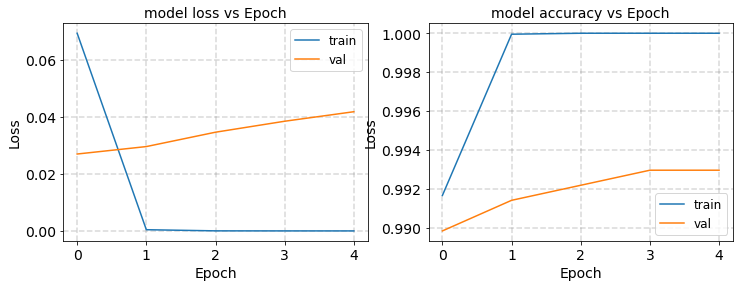

round1 [2 7 4 6]
2
Epoch 1/5
1250/1250 - 3s - loss: 0.0796 - accuracy: 0.9871 - val_loss: 0.0479 - val_accuracy: 0.9898
Epoch 2/5
1250/1250 - 3s - loss: 2.1384e-04 - accuracy: 1.0000 - val_loss: 0.0743 - val_accuracy: 0.9890
Epoch 3/5
1250/1250 - 3s - loss: 1.0886e-05 - accuracy: 1.0000 - val_loss: 0.0918 - val_accuracy: 0.9906
Epoch 4/5
1250/1250 - 3s - loss: 2.2369e-06 - accuracy: 1.0000 - val_loss: 0.1034 - val_accuracy: 0.9898
Epoch 5/5
1250/1250 - 3s - loss: 7.3491e-07 - accuracy: 1.0000 - val_loss: 0.1127 - val_accuracy: 0.9906


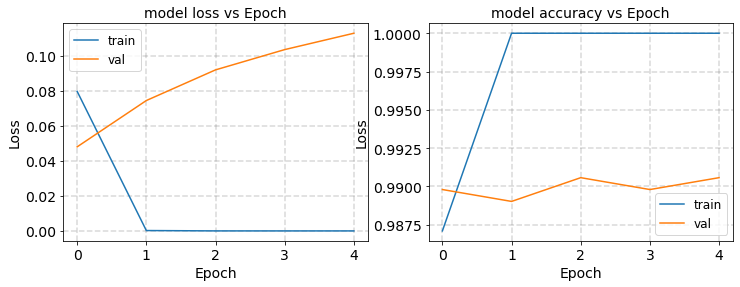

7
Epoch 1/5
1250/1250 - 3s - loss: 0.0896 - accuracy: 0.9877 - val_loss: 0.0293 - val_accuracy: 0.9890
Epoch 2/5
1250/1250 - 3s - loss: 0.0012 - accuracy: 0.9997 - val_loss: 0.0379 - val_accuracy: 0.9906
Epoch 3/5
1250/1250 - 3s - loss: 5.6701e-05 - accuracy: 1.0000 - val_loss: 0.0488 - val_accuracy: 0.9906
Epoch 4/5
1250/1250 - 3s - loss: 1.3699e-05 - accuracy: 1.0000 - val_loss: 0.0542 - val_accuracy: 0.9906
Epoch 5/5
1250/1250 - 3s - loss: 4.9850e-06 - accuracy: 1.0000 - val_loss: 0.0621 - val_accuracy: 0.9906


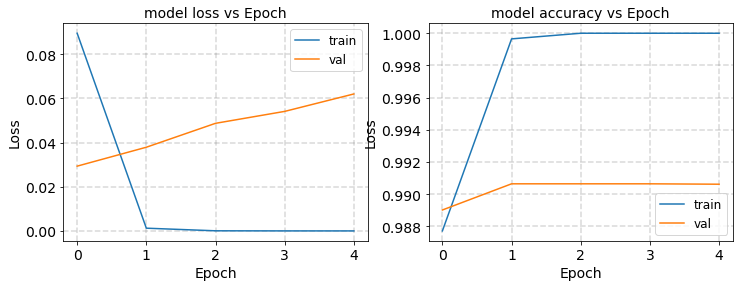

4
Epoch 1/5
1250/1250 - 3s - loss: 0.0728 - accuracy: 0.9882 - val_loss: 0.0325 - val_accuracy: 0.9937
Epoch 2/5
1250/1250 - 3s - loss: 3.4508e-04 - accuracy: 0.9999 - val_loss: 0.0391 - val_accuracy: 0.9937
Epoch 3/5
1250/1250 - 3s - loss: 4.1012e-05 - accuracy: 1.0000 - val_loss: 0.0453 - val_accuracy: 0.9937
Epoch 4/5
1250/1250 - 3s - loss: 8.9475e-06 - accuracy: 1.0000 - val_loss: 0.0525 - val_accuracy: 0.9930
Epoch 5/5
1250/1250 - 3s - loss: 2.1824e-06 - accuracy: 1.0000 - val_loss: 0.0584 - val_accuracy: 0.9930


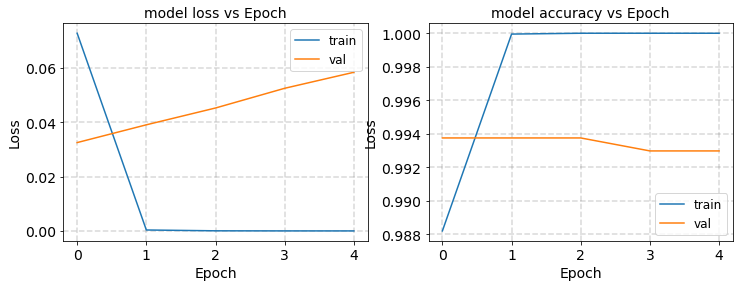

6
Epoch 1/5
1250/1250 - 3s - loss: 0.0513 - accuracy: 0.9936 - val_loss: 0.0372 - val_accuracy: 0.9905
Epoch 2/5
1250/1250 - 3s - loss: 9.9320e-05 - accuracy: 1.0000 - val_loss: 0.0467 - val_accuracy: 0.9913
Epoch 3/5
1250/1250 - 3s - loss: 1.5651e-05 - accuracy: 1.0000 - val_loss: 0.0543 - val_accuracy: 0.9905
Epoch 4/5
1250/1250 - 3s - loss: 4.1836e-06 - accuracy: 1.0000 - val_loss: 0.0605 - val_accuracy: 0.9913
Epoch 5/5
1250/1250 - 3s - loss: 1.4838e-06 - accuracy: 1.0000 - val_loss: 0.0659 - val_accuracy: 0.9929


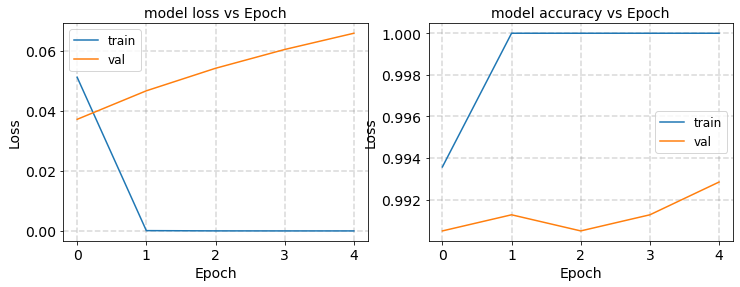

round2 [6 7 4 2]
6
Epoch 1/5
1250/1250 - 3s - loss: 6.0426e-07 - accuracy: 1.0000 - val_loss: 0.0714 - val_accuracy: 0.9929
Epoch 2/5
1250/1250 - 3s - loss: 2.7553e-07 - accuracy: 1.0000 - val_loss: 0.0758 - val_accuracy: 0.9929
Epoch 3/5
1250/1250 - 3s - loss: 1.3350e-07 - accuracy: 1.0000 - val_loss: 0.0800 - val_accuracy: 0.9920
Epoch 4/5
1250/1250 - 3s - loss: 6.6395e-08 - accuracy: 1.0000 - val_loss: 0.0841 - val_accuracy: 0.9920
Epoch 5/5
1250/1250 - 3s - loss: 3.4750e-08 - accuracy: 1.0000 - val_loss: 0.0881 - val_accuracy: 0.9920


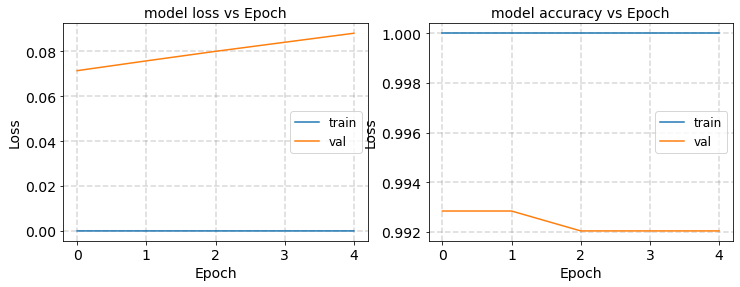

7
Epoch 1/5
1250/1250 - 3s - loss: 0.1221 - accuracy: 0.9909 - val_loss: 0.0402 - val_accuracy: 0.9930
Epoch 2/5
1250/1250 - 3s - loss: 2.2257e-04 - accuracy: 1.0000 - val_loss: 0.0503 - val_accuracy: 0.9930
Epoch 3/5
1250/1250 - 3s - loss: 3.4311e-05 - accuracy: 1.0000 - val_loss: 0.0582 - val_accuracy: 0.9930
Epoch 4/5
1250/1250 - 3s - loss: 1.0283e-05 - accuracy: 1.0000 - val_loss: 0.0636 - val_accuracy: 0.9930
Epoch 5/5
1250/1250 - 3s - loss: 3.4640e-06 - accuracy: 1.0000 - val_loss: 0.0725 - val_accuracy: 0.9930


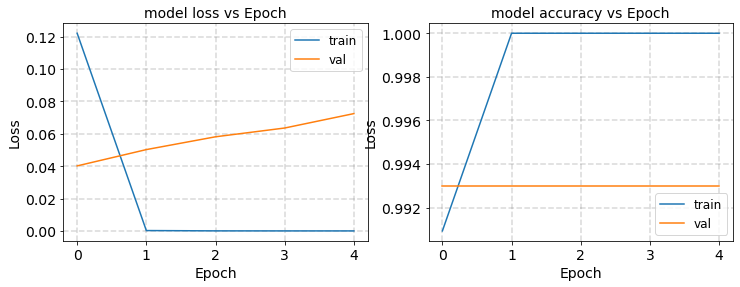

4
Epoch 1/5
1250/1250 - 3s - loss: 0.0884 - accuracy: 0.9872 - val_loss: 0.0364 - val_accuracy: 0.9906
Epoch 2/5
1250/1250 - 3s - loss: 0.0015 - accuracy: 0.9998 - val_loss: 0.0484 - val_accuracy: 0.9914
Epoch 3/5
1250/1250 - 3s - loss: 4.9972e-04 - accuracy: 0.9999 - val_loss: 0.0700 - val_accuracy: 0.9922
Epoch 4/5
1250/1250 - 3s - loss: 5.3964e-05 - accuracy: 1.0000 - val_loss: 0.0797 - val_accuracy: 0.9913
Epoch 5/5
1250/1250 - 3s - loss: 4.4113e-06 - accuracy: 1.0000 - val_loss: 0.0871 - val_accuracy: 0.9913


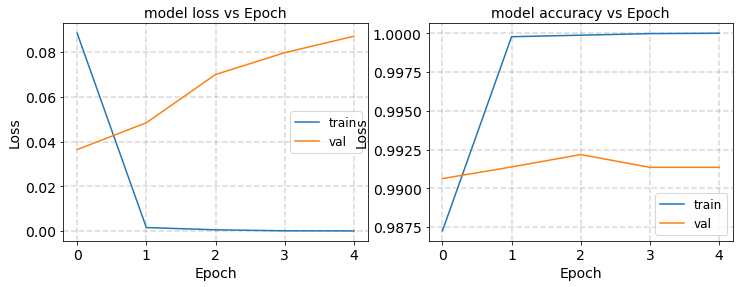

2
Epoch 1/5
1250/1250 - 3s - loss: 0.0709 - accuracy: 0.9913 - val_loss: 0.0412 - val_accuracy: 0.9898
Epoch 2/5
1250/1250 - 3s - loss: 1.1964e-04 - accuracy: 1.0000 - val_loss: 0.0547 - val_accuracy: 0.9906
Epoch 3/5
1250/1250 - 3s - loss: 1.7095e-05 - accuracy: 1.0000 - val_loss: 0.0593 - val_accuracy: 0.9922
Epoch 4/5
1250/1250 - 3s - loss: 4.7931e-06 - accuracy: 1.0000 - val_loss: 0.0648 - val_accuracy: 0.9930
Epoch 5/5
1250/1250 - 3s - loss: 1.6325e-06 - accuracy: 1.0000 - val_loss: 0.0698 - val_accuracy: 0.9922


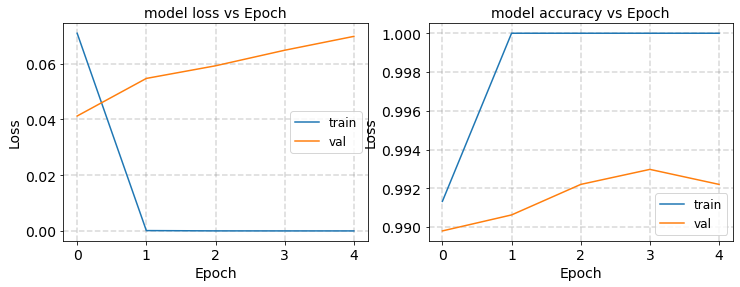

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_flatten_ (None, 784)               1         
_________________________________________________________________
prune_low_magnitude_dense_30 (None, 256)               401666    
_________________________________________________________________
prune_low_magnitude_dense_31 (None, 256)               131330    
_________________________________________________________________
prune_low_magnitude_dense_32 (None, 256)               131330    
_________________________________________________________________
prune_low_magnitude_dense_33 (None, 256)               131330    
_________________________________________________________________
dense_35 (Dense)             (None, 4)                 1028      
Total params: 796,685
Trainable params: 399,364
Non-trainable params: 397,321
_________________________________________

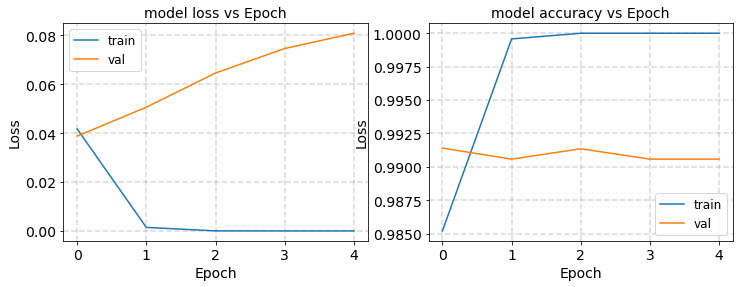

7
Epoch 1/5
1250/1250 - 3s - loss: 0.0734 - accuracy: 0.9885 - val_loss: 0.0358 - val_accuracy: 0.9890
Epoch 2/5
1250/1250 - 3s - loss: 0.0015 - accuracy: 0.9997 - val_loss: 0.0350 - val_accuracy: 0.9922
Epoch 3/5
1250/1250 - 3s - loss: 5.8052e-05 - accuracy: 1.0000 - val_loss: 0.0434 - val_accuracy: 0.9922
Epoch 4/5
1250/1250 - 3s - loss: 1.6961e-05 - accuracy: 1.0000 - val_loss: 0.0457 - val_accuracy: 0.9906
Epoch 5/5
1250/1250 - 3s - loss: 6.3728e-06 - accuracy: 1.0000 - val_loss: 0.0519 - val_accuracy: 0.9914


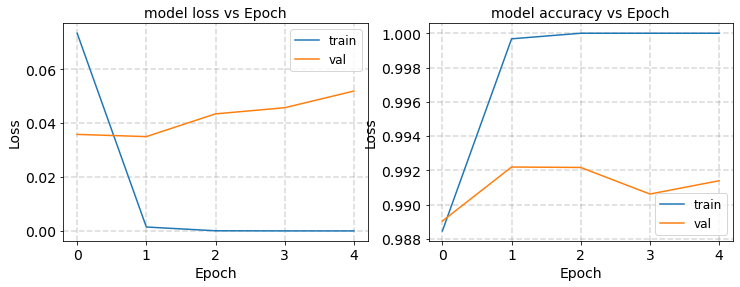

4
Epoch 1/5
1250/1250 - 3s - loss: 0.0538 - accuracy: 0.9893 - val_loss: 0.0278 - val_accuracy: 0.9914
Epoch 2/5
1250/1250 - 3s - loss: 0.0018 - accuracy: 0.9997 - val_loss: 0.0364 - val_accuracy: 0.9937
Epoch 3/5
1250/1250 - 3s - loss: 5.5067e-04 - accuracy: 0.9999 - val_loss: 0.0450 - val_accuracy: 0.9930
Epoch 4/5
1250/1250 - 3s - loss: 2.2063e-05 - accuracy: 1.0000 - val_loss: 0.0501 - val_accuracy: 0.9937
Epoch 5/5
1250/1250 - 3s - loss: 5.8322e-06 - accuracy: 1.0000 - val_loss: 0.0539 - val_accuracy: 0.9937


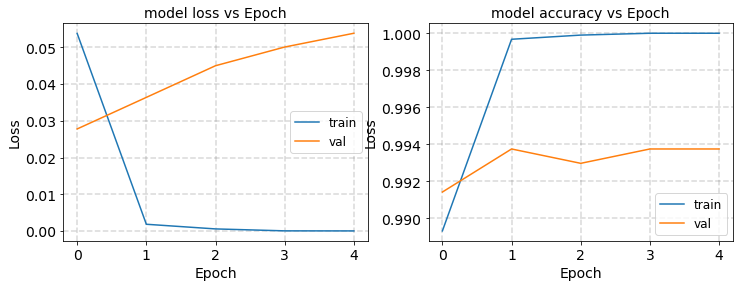

6
Epoch 1/5
1250/1250 - 3s - loss: 0.0460 - accuracy: 0.9926 - val_loss: 0.0324 - val_accuracy: 0.9929
Epoch 2/5
1250/1250 - 3s - loss: 1.5919e-04 - accuracy: 1.0000 - val_loss: 0.0461 - val_accuracy: 0.9913
Epoch 3/5
1250/1250 - 3s - loss: 1.3653e-05 - accuracy: 1.0000 - val_loss: 0.0556 - val_accuracy: 0.9912
Epoch 4/5
1250/1250 - 3s - loss: 3.0382e-06 - accuracy: 1.0000 - val_loss: 0.0607 - val_accuracy: 0.9905
Epoch 5/5
1250/1250 - 3s - loss: 9.8516e-07 - accuracy: 1.0000 - val_loss: 0.0672 - val_accuracy: 0.9912


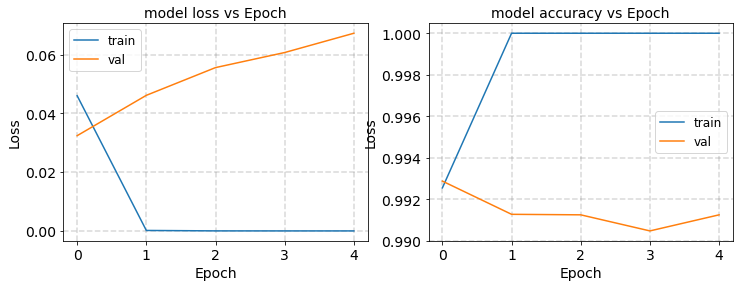

round1 [2 6 7 4]
2
Epoch 1/5
1250/1250 - 3s - loss: 0.0755 - accuracy: 0.9884 - val_loss: 0.0528 - val_accuracy: 0.9867
Epoch 2/5
1250/1250 - 3s - loss: 1.3575e-04 - accuracy: 1.0000 - val_loss: 0.0625 - val_accuracy: 0.9867
Epoch 3/5
1250/1250 - 3s - loss: 1.6702e-05 - accuracy: 1.0000 - val_loss: 0.0793 - val_accuracy: 0.9883
Epoch 4/5
1250/1250 - 3s - loss: 2.2436e-06 - accuracy: 1.0000 - val_loss: 0.0933 - val_accuracy: 0.9883
Epoch 5/5
1250/1250 - 3s - loss: 6.3617e-07 - accuracy: 1.0000 - val_loss: 0.1022 - val_accuracy: 0.9875


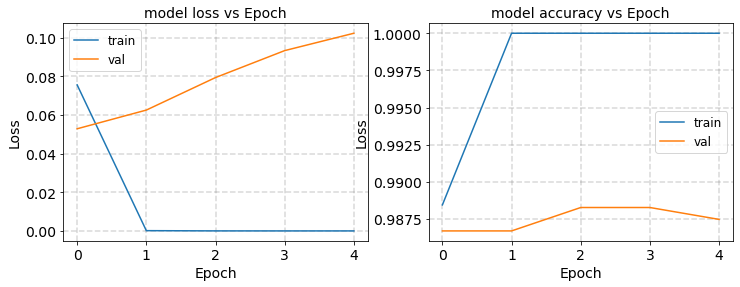

6
Epoch 1/5
1250/1250 - 3s - loss: 0.0675 - accuracy: 0.9913 - val_loss: 0.0498 - val_accuracy: 0.9929
Epoch 2/5
1250/1250 - 3s - loss: 4.0133e-05 - accuracy: 1.0000 - val_loss: 0.0583 - val_accuracy: 0.9929
Epoch 3/5
1250/1250 - 3s - loss: 1.1395e-05 - accuracy: 1.0000 - val_loss: 0.0649 - val_accuracy: 0.9937
Epoch 4/5
1250/1250 - 3s - loss: 3.9233e-06 - accuracy: 1.0000 - val_loss: 0.0723 - val_accuracy: 0.9937
Epoch 5/5
1250/1250 - 3s - loss: 1.4262e-06 - accuracy: 1.0000 - val_loss: 0.0789 - val_accuracy: 0.9937


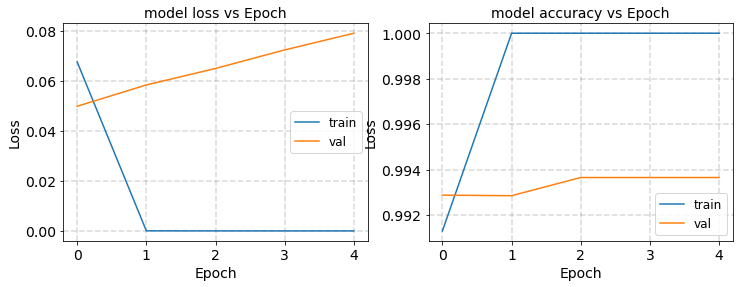

7
Epoch 1/5
1250/1250 - 3s - loss: 0.1083 - accuracy: 0.9884 - val_loss: 0.0308 - val_accuracy: 0.9921
Epoch 2/5
1250/1250 - 3s - loss: 5.9883e-04 - accuracy: 0.9999 - val_loss: 0.0489 - val_accuracy: 0.9921
Epoch 3/5
1250/1250 - 3s - loss: 3.8138e-05 - accuracy: 1.0000 - val_loss: 0.0573 - val_accuracy: 0.9921
Epoch 4/5
1250/1250 - 3s - loss: 1.1749e-05 - accuracy: 1.0000 - val_loss: 0.0642 - val_accuracy: 0.9921
Epoch 5/5
1250/1250 - 3s - loss: 4.2710e-06 - accuracy: 1.0000 - val_loss: 0.0707 - val_accuracy: 0.9921


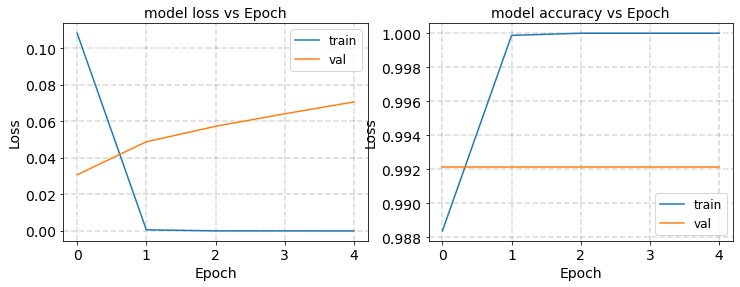

4
Epoch 1/5
1250/1250 - 3s - loss: 0.0763 - accuracy: 0.9888 - val_loss: 0.0474 - val_accuracy: 0.9937
Epoch 2/5
1250/1250 - 3s - loss: 6.9329e-04 - accuracy: 0.9999 - val_loss: 0.0512 - val_accuracy: 0.9937
Epoch 3/5
1250/1250 - 3s - loss: 3.1064e-05 - accuracy: 1.0000 - val_loss: 0.0558 - val_accuracy: 0.9937
Epoch 4/5
1250/1250 - 3s - loss: 9.7741e-06 - accuracy: 1.0000 - val_loss: 0.0599 - val_accuracy: 0.9945
Epoch 5/5
1250/1250 - 3s - loss: 3.7794e-06 - accuracy: 1.0000 - val_loss: 0.0632 - val_accuracy: 0.9953


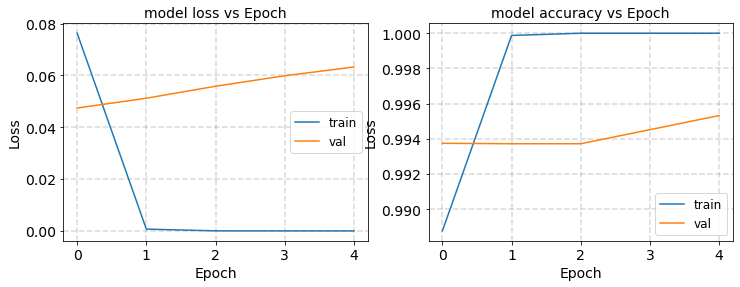

round2 [4 2 7 6]
4
Epoch 1/5
1250/1250 - 3s - loss: 1.5197e-06 - accuracy: 1.0000 - val_loss: 0.0665 - val_accuracy: 0.9953
Epoch 2/5
1250/1250 - 3s - loss: 6.4063e-07 - accuracy: 1.0000 - val_loss: 0.0706 - val_accuracy: 0.9953
Epoch 3/5
1250/1250 - 3s - loss: 2.7510e-07 - accuracy: 1.0000 - val_loss: 0.0741 - val_accuracy: 0.9953
Epoch 4/5
1250/1250 - 3s - loss: 1.2466e-07 - accuracy: 1.0000 - val_loss: 0.0778 - val_accuracy: 0.9953
Epoch 5/5
1250/1250 - 3s - loss: 5.8946e-08 - accuracy: 1.0000 - val_loss: 0.0812 - val_accuracy: 0.9953


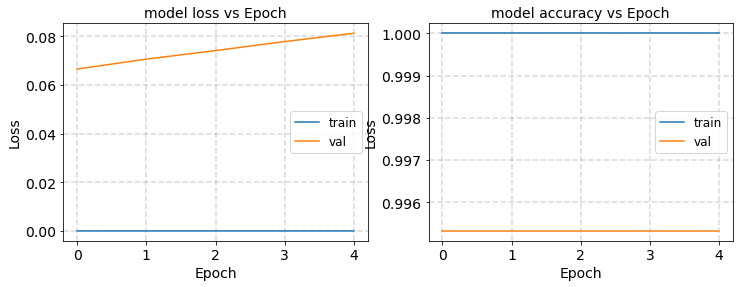

2
Epoch 1/5
1250/1250 - 3s - loss: 0.0863 - accuracy: 0.9919 - val_loss: 0.0393 - val_accuracy: 0.9930
Epoch 2/5
1250/1250 - 3s - loss: 1.7027e-04 - accuracy: 1.0000 - val_loss: 0.0461 - val_accuracy: 0.9945
Epoch 3/5
1250/1250 - 3s - loss: 2.3960e-05 - accuracy: 1.0000 - val_loss: 0.0526 - val_accuracy: 0.9945
Epoch 4/5
1250/1250 - 3s - loss: 6.0563e-06 - accuracy: 1.0000 - val_loss: 0.0594 - val_accuracy: 0.9937
Epoch 5/5
1250/1250 - 3s - loss: 1.7288e-06 - accuracy: 1.0000 - val_loss: 0.0658 - val_accuracy: 0.9937


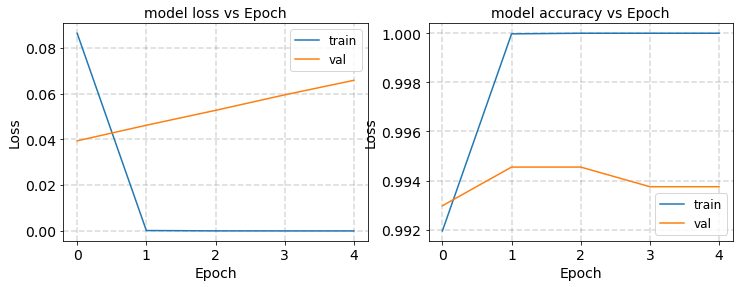

7
Epoch 1/5
1250/1250 - 3s - loss: 0.0777 - accuracy: 0.9905 - val_loss: 0.0237 - val_accuracy: 0.9930
Epoch 2/5
1250/1250 - 3s - loss: 6.4305e-04 - accuracy: 0.9999 - val_loss: 0.0289 - val_accuracy: 0.9929
Epoch 3/5
1250/1250 - 3s - loss: 7.4394e-05 - accuracy: 1.0000 - val_loss: 0.0327 - val_accuracy: 0.9929
Epoch 4/5
1250/1250 - 3s - loss: 2.2261e-05 - accuracy: 1.0000 - val_loss: 0.0373 - val_accuracy: 0.9937
Epoch 5/5
1250/1250 - 3s - loss: 7.7103e-06 - accuracy: 1.0000 - val_loss: 0.0396 - val_accuracy: 0.9937


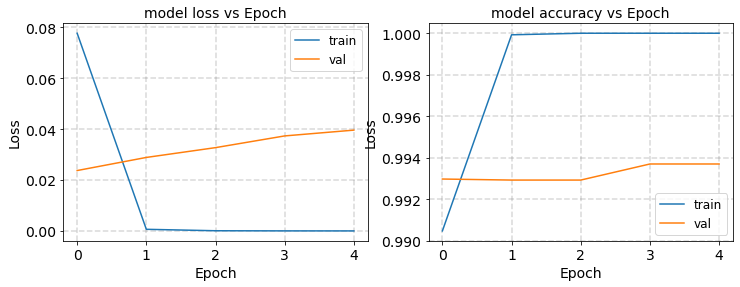

6
Epoch 1/5
1250/1250 - 3s - loss: 0.0652 - accuracy: 0.9941 - val_loss: 0.0302 - val_accuracy: 0.9944
Epoch 2/5
1250/1250 - 3s - loss: 7.5615e-05 - accuracy: 1.0000 - val_loss: 0.0367 - val_accuracy: 0.9944
Epoch 3/5
1250/1250 - 3s - loss: 1.2331e-05 - accuracy: 1.0000 - val_loss: 0.0432 - val_accuracy: 0.9944
Epoch 4/5
1250/1250 - 3s - loss: 3.1580e-06 - accuracy: 1.0000 - val_loss: 0.0473 - val_accuracy: 0.9944
Epoch 5/5
1250/1250 - 3s - loss: 1.0997e-06 - accuracy: 1.0000 - val_loss: 0.0516 - val_accuracy: 0.9944


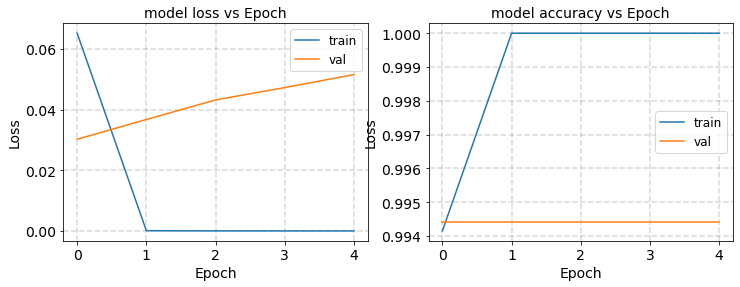

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_flatten_ (None, 784)               1         
_________________________________________________________________
prune_low_magnitude_dense_36 (None, 256)               401666    
_________________________________________________________________
prune_low_magnitude_dense_37 (None, 256)               131330    
_________________________________________________________________
prune_low_magnitude_dense_38 (None, 256)               131330    
_________________________________________________________________
prune_low_magnitude_dense_39 (None, 256)               131330    
_________________________________________________________________
dense_41 (Dense)             (None, 4)                 1028      
Total params: 796,685
Trainable params: 399,364
Non-trainable params: 397,321
_________________________________________

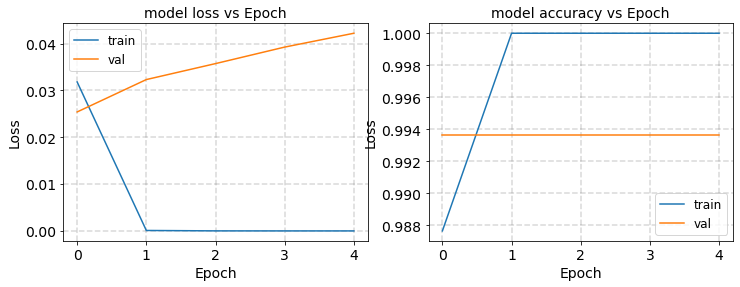

7
Epoch 1/5
1250/1250 - 3s - loss: 0.0555 - accuracy: 0.9906 - val_loss: 0.0273 - val_accuracy: 0.9906
Epoch 2/5
1250/1250 - 3s - loss: 0.0017 - accuracy: 0.9996 - val_loss: 0.0385 - val_accuracy: 0.9906
Epoch 3/5
1250/1250 - 3s - loss: 3.7163e-05 - accuracy: 1.0000 - val_loss: 0.0443 - val_accuracy: 0.9914
Epoch 4/5
1250/1250 - 3s - loss: 1.0657e-05 - accuracy: 1.0000 - val_loss: 0.0499 - val_accuracy: 0.9898
Epoch 5/5
1250/1250 - 3s - loss: 4.0927e-06 - accuracy: 1.0000 - val_loss: 0.0541 - val_accuracy: 0.9906


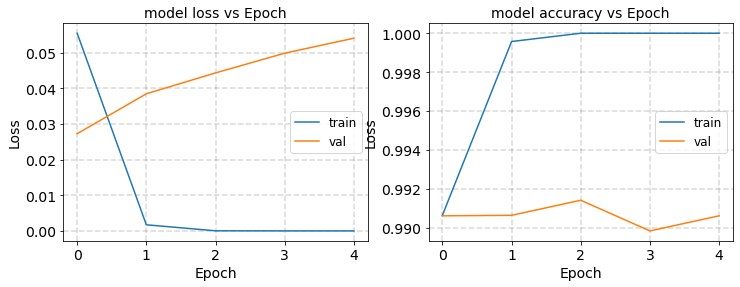

4
Epoch 1/5
1250/1250 - 3s - loss: 0.0619 - accuracy: 0.9887 - val_loss: 0.0306 - val_accuracy: 0.9914
Epoch 2/5
1250/1250 - 3s - loss: 0.0011 - accuracy: 0.9998 - val_loss: 0.0408 - val_accuracy: 0.9930
Epoch 3/5
1250/1250 - 3s - loss: 5.1496e-05 - accuracy: 1.0000 - val_loss: 0.0511 - val_accuracy: 0.9922
Epoch 4/5
1250/1250 - 3s - loss: 8.7148e-06 - accuracy: 1.0000 - val_loss: 0.0583 - val_accuracy: 0.9930
Epoch 5/5
1250/1250 - 3s - loss: 2.6259e-06 - accuracy: 1.0000 - val_loss: 0.0645 - val_accuracy: 0.9938


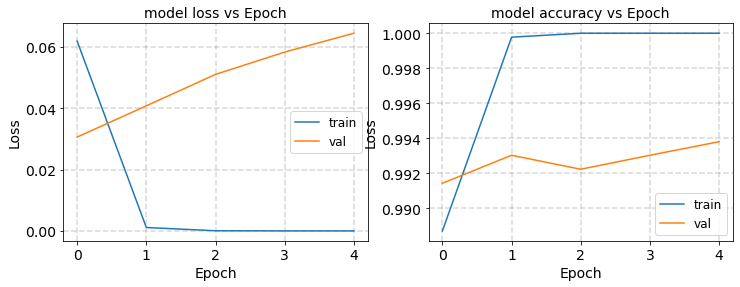

2
Epoch 1/5
1250/1250 - 3s - loss: 0.0586 - accuracy: 0.9906 - val_loss: 0.0441 - val_accuracy: 0.9890
Epoch 2/5
1250/1250 - 3s - loss: 7.2724e-04 - accuracy: 0.9998 - val_loss: 0.0598 - val_accuracy: 0.9890
Epoch 3/5
1250/1250 - 3s - loss: 2.2543e-05 - accuracy: 1.0000 - val_loss: 0.0686 - val_accuracy: 0.9890
Epoch 4/5
1250/1250 - 3s - loss: 6.6732e-06 - accuracy: 1.0000 - val_loss: 0.0757 - val_accuracy: 0.9898
Epoch 5/5
1250/1250 - 3s - loss: 2.3942e-06 - accuracy: 1.0000 - val_loss: 0.0834 - val_accuracy: 0.9882


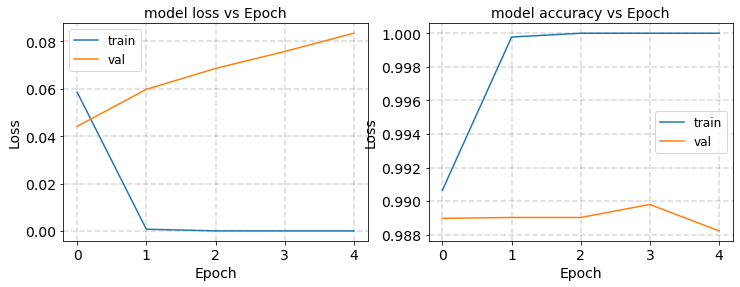

round1 [6 4 7 2]
6
Epoch 1/5
1250/1250 - 3s - loss: 0.0822 - accuracy: 0.9881 - val_loss: 0.0251 - val_accuracy: 0.9936
Epoch 2/5
1250/1250 - 3s - loss: 2.4498e-04 - accuracy: 0.9999 - val_loss: 0.0300 - val_accuracy: 0.9937
Epoch 3/5
1250/1250 - 3s - loss: 1.9361e-05 - accuracy: 1.0000 - val_loss: 0.0348 - val_accuracy: 0.9944
Epoch 4/5
1250/1250 - 3s - loss: 3.6013e-06 - accuracy: 1.0000 - val_loss: 0.0393 - val_accuracy: 0.9944
Epoch 5/5
1250/1250 - 3s - loss: 1.0146e-06 - accuracy: 1.0000 - val_loss: 0.0433 - val_accuracy: 0.9944


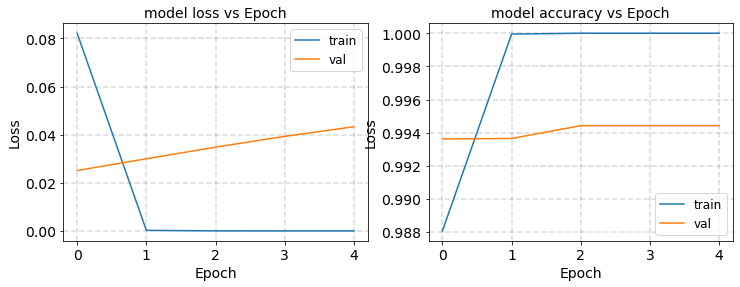

4
Epoch 1/5
1250/1250 - 3s - loss: 0.0752 - accuracy: 0.9879 - val_loss: 0.0224 - val_accuracy: 0.9937
Epoch 2/5
1250/1250 - 3s - loss: 0.0017 - accuracy: 0.9997 - val_loss: 0.0278 - val_accuracy: 0.9922
Epoch 3/5
1250/1250 - 3s - loss: 1.5177e-04 - accuracy: 1.0000 - val_loss: 0.0331 - val_accuracy: 0.9922
Epoch 4/5
1250/1250 - 3s - loss: 2.7303e-05 - accuracy: 1.0000 - val_loss: 0.0360 - val_accuracy: 0.9922
Epoch 5/5
1250/1250 - 3s - loss: 8.3681e-06 - accuracy: 1.0000 - val_loss: 0.0407 - val_accuracy: 0.9922


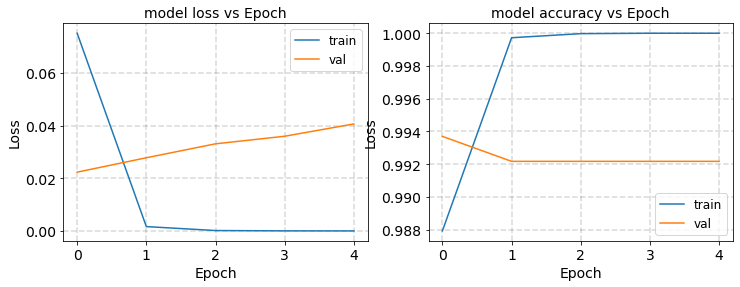

7
Epoch 1/5
1250/1250 - 3s - loss: 0.0581 - accuracy: 0.9928 - val_loss: 0.0360 - val_accuracy: 0.9914
Epoch 2/5
1250/1250 - 3s - loss: 3.9220e-04 - accuracy: 1.0000 - val_loss: 0.0424 - val_accuracy: 0.9930
Epoch 3/5
1250/1250 - 3s - loss: 3.8276e-05 - accuracy: 1.0000 - val_loss: 0.0509 - val_accuracy: 0.9930
Epoch 4/5
1250/1250 - 3s - loss: 7.9619e-06 - accuracy: 1.0000 - val_loss: 0.0587 - val_accuracy: 0.9930
Epoch 5/5
1250/1250 - 3s - loss: 2.3290e-06 - accuracy: 1.0000 - val_loss: 0.0657 - val_accuracy: 0.9930


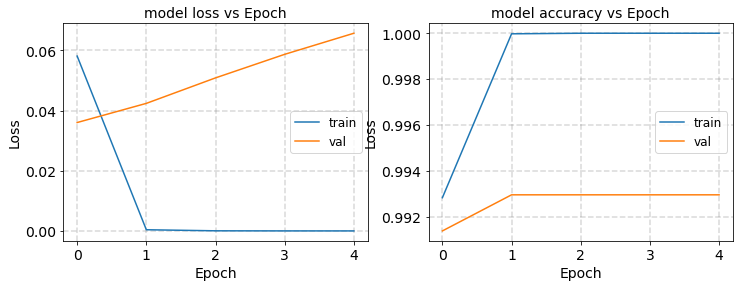

2
Epoch 1/5
1250/1250 - 3s - loss: 0.0961 - accuracy: 0.9893 - val_loss: 0.0461 - val_accuracy: 0.9882
Epoch 2/5
1250/1250 - 3s - loss: 1.4406e-04 - accuracy: 1.0000 - val_loss: 0.0626 - val_accuracy: 0.9883
Epoch 3/5
1250/1250 - 3s - loss: 2.6542e-05 - accuracy: 1.0000 - val_loss: 0.0710 - val_accuracy: 0.9883
Epoch 4/5
1250/1250 - 3s - loss: 9.6543e-06 - accuracy: 1.0000 - val_loss: 0.0771 - val_accuracy: 0.9883
Epoch 5/5
1250/1250 - 3s - loss: 3.9854e-06 - accuracy: 1.0000 - val_loss: 0.0821 - val_accuracy: 0.9883


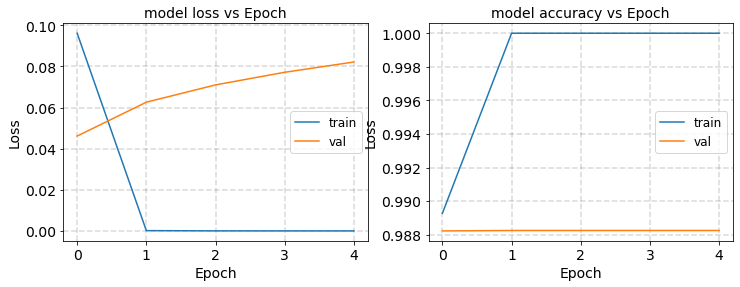

round2 [6 7 2 4]
6
Epoch 1/5
1250/1250 - 3s - loss: 0.0562 - accuracy: 0.9929 - val_loss: 0.0307 - val_accuracy: 0.9937
Epoch 2/5
1250/1250 - 3s - loss: 1.4725e-04 - accuracy: 1.0000 - val_loss: 0.0378 - val_accuracy: 0.9937
Epoch 3/5
1250/1250 - 3s - loss: 1.7322e-05 - accuracy: 1.0000 - val_loss: 0.0460 - val_accuracy: 0.9937
Epoch 4/5
1250/1250 - 3s - loss: 4.9277e-06 - accuracy: 1.0000 - val_loss: 0.0512 - val_accuracy: 0.9937
Epoch 5/5
1250/1250 - 3s - loss: 1.8198e-06 - accuracy: 1.0000 - val_loss: 0.0548 - val_accuracy: 0.9937


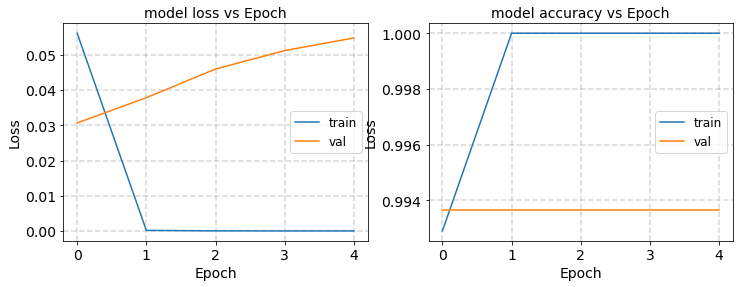

7
Epoch 1/5
1250/1250 - 3s - loss: 0.0860 - accuracy: 0.9889 - val_loss: 0.0269 - val_accuracy: 0.9906
Epoch 2/5
1250/1250 - 3s - loss: 0.0013 - accuracy: 0.9998 - val_loss: 0.0311 - val_accuracy: 0.9930
Epoch 3/5
1250/1250 - 3s - loss: 6.8270e-05 - accuracy: 1.0000 - val_loss: 0.0370 - val_accuracy: 0.9922
Epoch 4/5
1250/1250 - 3s - loss: 1.3784e-05 - accuracy: 1.0000 - val_loss: 0.0415 - val_accuracy: 0.9930
Epoch 5/5
1250/1250 - 3s - loss: 4.4410e-06 - accuracy: 1.0000 - val_loss: 0.0455 - val_accuracy: 0.9930


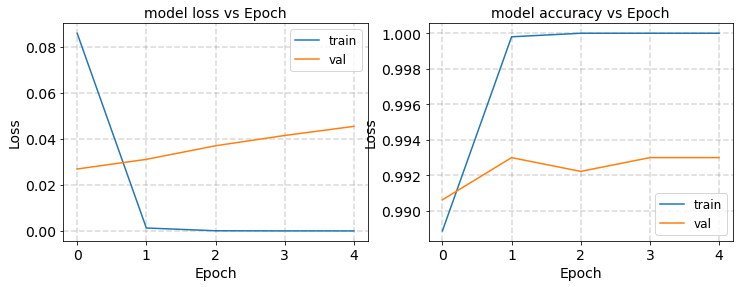

2
Epoch 1/5
1250/1250 - 3s - loss: 0.0833 - accuracy: 0.9883 - val_loss: 0.0409 - val_accuracy: 0.9898
Epoch 2/5
1250/1250 - 3s - loss: 6.8457e-04 - accuracy: 0.9999 - val_loss: 0.0483 - val_accuracy: 0.9906
Epoch 3/5
1250/1250 - 3s - loss: 6.0939e-05 - accuracy: 1.0000 - val_loss: 0.0545 - val_accuracy: 0.9914
Epoch 4/5
1250/1250 - 3s - loss: 1.8005e-05 - accuracy: 1.0000 - val_loss: 0.0617 - val_accuracy: 0.9914
Epoch 5/5
1250/1250 - 3s - loss: 6.0207e-06 - accuracy: 1.0000 - val_loss: 0.0684 - val_accuracy: 0.9914


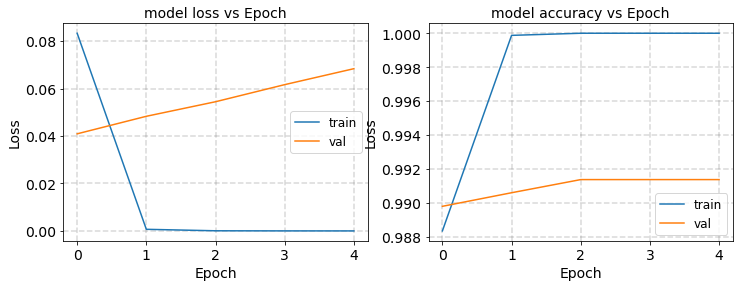

4
Epoch 1/5
1250/1250 - 3s - loss: 0.0837 - accuracy: 0.9876 - val_loss: 0.0322 - val_accuracy: 0.9945
Epoch 2/5
1250/1250 - 3s - loss: 0.0013 - accuracy: 0.9998 - val_loss: 0.0410 - val_accuracy: 0.9937
Epoch 3/5
1250/1250 - 3s - loss: 2.5629e-04 - accuracy: 0.9999 - val_loss: 0.0492 - val_accuracy: 0.9937
Epoch 4/5
1250/1250 - 3s - loss: 4.4119e-05 - accuracy: 1.0000 - val_loss: 0.0573 - val_accuracy: 0.9937
Epoch 5/5
1250/1250 - 3s - loss: 6.9915e-06 - accuracy: 1.0000 - val_loss: 0.0623 - val_accuracy: 0.9937


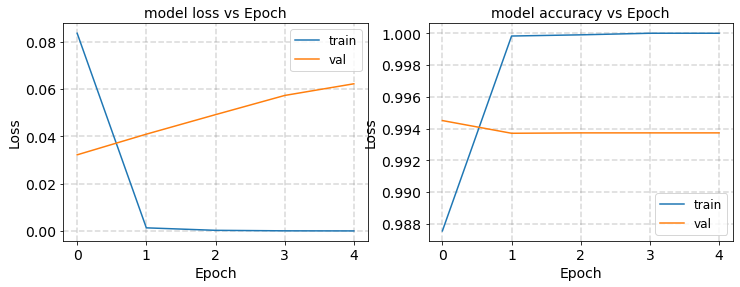

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_flatten_ (None, 784)               1         
_________________________________________________________________
prune_low_magnitude_dense_42 (None, 256)               401666    
_________________________________________________________________
prune_low_magnitude_dense_43 (None, 256)               131330    
_________________________________________________________________
prune_low_magnitude_dense_44 (None, 256)               131330    
_________________________________________________________________
prune_low_magnitude_dense_45 (None, 256)               131330    
_________________________________________________________________
dense_47 (Dense)             (None, 4)                 1028      
Total params: 796,685
Trainable params: 399,364
Non-trainable params: 397,321
_________________________________________

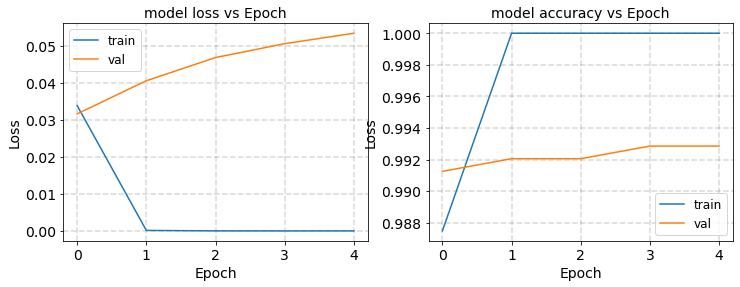

2
Epoch 1/5
1250/1250 - 3s - loss: 0.0638 - accuracy: 0.9872 - val_loss: 0.0429 - val_accuracy: 0.9883
Epoch 2/5
1250/1250 - 3s - loss: 0.0018 - accuracy: 0.9995 - val_loss: 0.0643 - val_accuracy: 0.9890
Epoch 3/5
1250/1250 - 3s - loss: 4.7706e-05 - accuracy: 1.0000 - val_loss: 0.0722 - val_accuracy: 0.9890
Epoch 4/5
1250/1250 - 3s - loss: 1.3102e-05 - accuracy: 1.0000 - val_loss: 0.0778 - val_accuracy: 0.9890
Epoch 5/5
1250/1250 - 3s - loss: 4.8169e-06 - accuracy: 1.0000 - val_loss: 0.0830 - val_accuracy: 0.9883


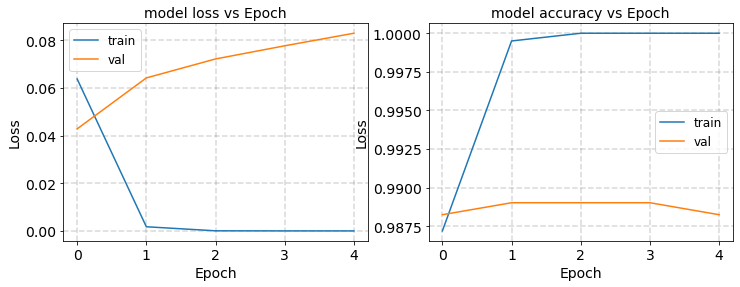

4
Epoch 1/5
1250/1250 - 3s - loss: 0.0650 - accuracy: 0.9872 - val_loss: 0.0206 - val_accuracy: 0.9922
Epoch 2/5
1250/1250 - 3s - loss: 0.0029 - accuracy: 0.9995 - val_loss: 0.0236 - val_accuracy: 0.9930
Epoch 3/5
1250/1250 - 3s - loss: 3.5869e-04 - accuracy: 0.9999 - val_loss: 0.0278 - val_accuracy: 0.9945
Epoch 4/5
1250/1250 - 3s - loss: 2.2136e-05 - accuracy: 1.0000 - val_loss: 0.0299 - val_accuracy: 0.9945
Epoch 5/5
1250/1250 - 3s - loss: 8.3821e-06 - accuracy: 1.0000 - val_loss: 0.0320 - val_accuracy: 0.9945


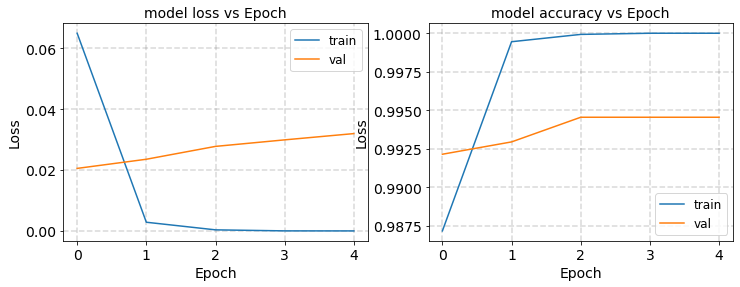

7
Epoch 1/5
1250/1250 - 3s - loss: 0.0717 - accuracy: 0.9891 - val_loss: 0.0344 - val_accuracy: 0.9890
Epoch 2/5
1250/1250 - 3s - loss: 8.5998e-04 - accuracy: 0.9998 - val_loss: 0.0445 - val_accuracy: 0.9914
Epoch 3/5
1250/1250 - 3s - loss: 4.5872e-05 - accuracy: 1.0000 - val_loss: 0.0520 - val_accuracy: 0.9906
Epoch 4/5
1250/1250 - 3s - loss: 1.1676e-05 - accuracy: 1.0000 - val_loss: 0.0570 - val_accuracy: 0.9906
Epoch 5/5
1250/1250 - 3s - loss: 4.1919e-06 - accuracy: 1.0000 - val_loss: 0.0618 - val_accuracy: 0.9906


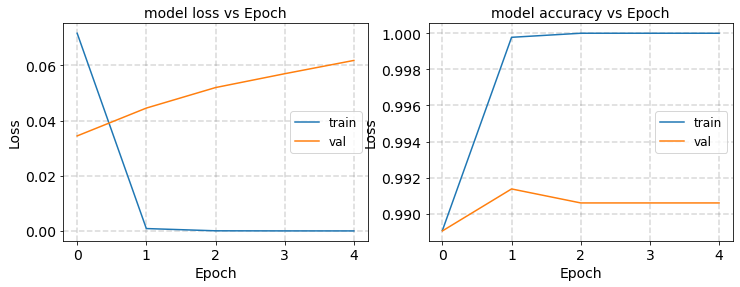

round1 [4 6 7 2]
4
Epoch 1/5
1250/1250 - 3s - loss: 0.0607 - accuracy: 0.9897 - val_loss: 0.0335 - val_accuracy: 0.9914
Epoch 2/5
1250/1250 - 3s - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.0372 - val_accuracy: 0.9930
Epoch 3/5
1250/1250 - 3s - loss: 8.5897e-04 - accuracy: 0.9997 - val_loss: 0.0386 - val_accuracy: 0.9937
Epoch 4/5
1250/1250 - 3s - loss: 2.0002e-05 - accuracy: 1.0000 - val_loss: 0.0431 - val_accuracy: 0.9937
Epoch 5/5
1250/1250 - 3s - loss: 7.6665e-06 - accuracy: 1.0000 - val_loss: 0.0473 - val_accuracy: 0.9945


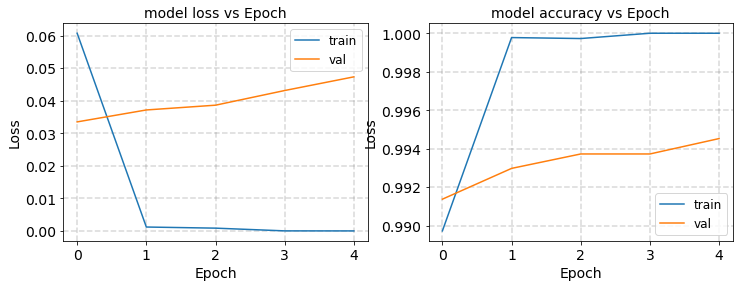

6
Epoch 1/5
1250/1250 - 3s - loss: 0.0541 - accuracy: 0.9924 - val_loss: 0.0300 - val_accuracy: 0.9929
Epoch 2/5
1250/1250 - 3s - loss: 1.1716e-04 - accuracy: 1.0000 - val_loss: 0.0387 - val_accuracy: 0.9936
Epoch 3/5
1250/1250 - 3s - loss: 2.2995e-05 - accuracy: 1.0000 - val_loss: 0.0439 - val_accuracy: 0.9936
Epoch 4/5
1250/1250 - 3s - loss: 5.5391e-06 - accuracy: 1.0000 - val_loss: 0.0486 - val_accuracy: 0.9936
Epoch 5/5
1250/1250 - 3s - loss: 1.8138e-06 - accuracy: 1.0000 - val_loss: 0.0538 - val_accuracy: 0.9936


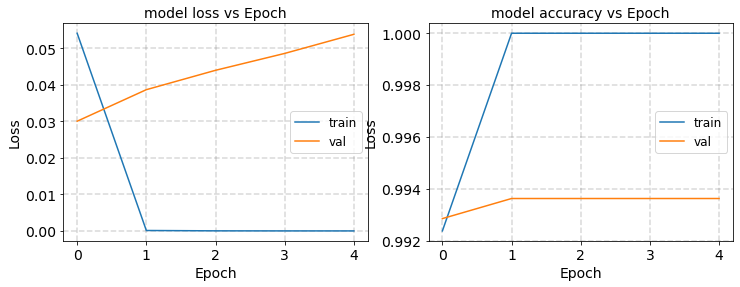

7
Epoch 1/5
1250/1250 - 3s - loss: 0.0844 - accuracy: 0.9889 - val_loss: 0.0363 - val_accuracy: 0.9914
Epoch 2/5
1250/1250 - 3s - loss: 2.1718e-04 - accuracy: 1.0000 - val_loss: 0.0455 - val_accuracy: 0.9930
Epoch 3/5
1250/1250 - 3s - loss: 3.2960e-05 - accuracy: 1.0000 - val_loss: 0.0526 - val_accuracy: 0.9922
Epoch 4/5
1250/1250 - 3s - loss: 9.3943e-06 - accuracy: 1.0000 - val_loss: 0.0592 - val_accuracy: 0.9930
Epoch 5/5
1250/1250 - 3s - loss: 3.1353e-06 - accuracy: 1.0000 - val_loss: 0.0643 - val_accuracy: 0.9922


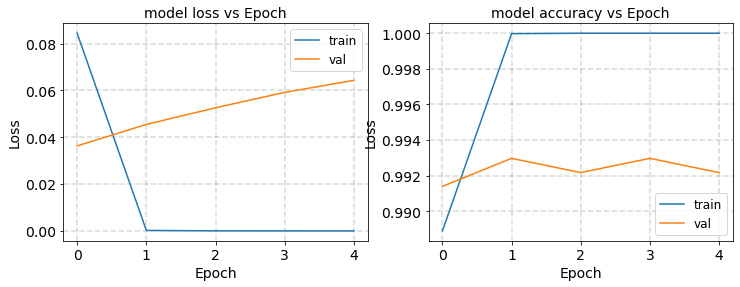

2
Epoch 1/5
1250/1250 - 3s - loss: 0.0857 - accuracy: 0.9900 - val_loss: 0.0628 - val_accuracy: 0.9883
Epoch 2/5
1250/1250 - 3s - loss: 1.6509e-04 - accuracy: 1.0000 - val_loss: 0.0783 - val_accuracy: 0.9883
Epoch 3/5
1250/1250 - 3s - loss: 2.1623e-05 - accuracy: 1.0000 - val_loss: 0.0899 - val_accuracy: 0.9875
Epoch 4/5
1250/1250 - 3s - loss: 7.0247e-06 - accuracy: 1.0000 - val_loss: 0.0986 - val_accuracy: 0.9883
Epoch 5/5
1250/1250 - 3s - loss: 2.8151e-06 - accuracy: 1.0000 - val_loss: 0.1063 - val_accuracy: 0.9875


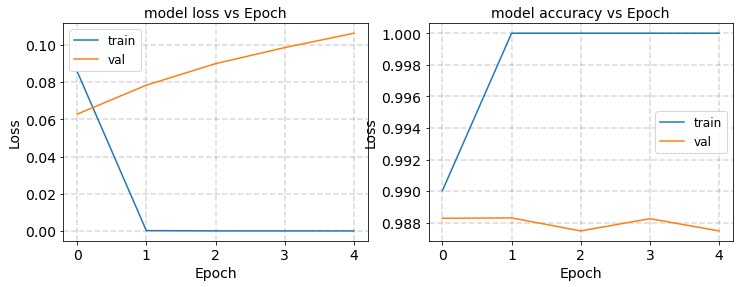

round2 [4 6 7 2]
4
Epoch 1/5
1250/1250 - 3s - loss: 0.0916 - accuracy: 0.9822 - val_loss: 0.0355 - val_accuracy: 0.9906
Epoch 2/5
1250/1250 - 3s - loss: 7.8292e-04 - accuracy: 0.9998 - val_loss: 0.0424 - val_accuracy: 0.9914
Epoch 3/5
1250/1250 - 3s - loss: 4.9192e-05 - accuracy: 1.0000 - val_loss: 0.0482 - val_accuracy: 0.9906
Epoch 4/5
1250/1250 - 3s - loss: 1.4872e-05 - accuracy: 1.0000 - val_loss: 0.0532 - val_accuracy: 0.9914
Epoch 5/5
1250/1250 - 3s - loss: 5.4336e-06 - accuracy: 1.0000 - val_loss: 0.0575 - val_accuracy: 0.9914


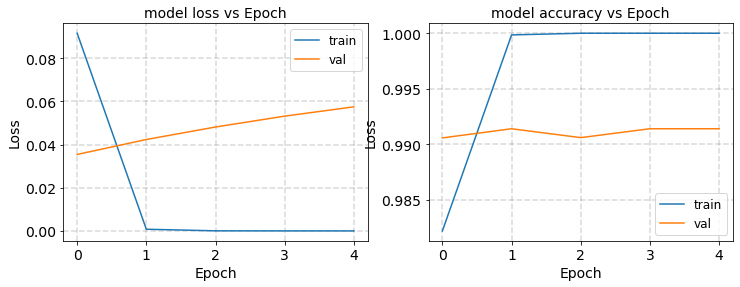

6
Epoch 1/5
1250/1250 - 3s - loss: 0.0559 - accuracy: 0.9934 - val_loss: 0.0220 - val_accuracy: 0.9944
Epoch 2/5
1250/1250 - 3s - loss: 7.4715e-05 - accuracy: 1.0000 - val_loss: 0.0266 - val_accuracy: 0.9944
Epoch 3/5
1250/1250 - 3s - loss: 1.4844e-05 - accuracy: 1.0000 - val_loss: 0.0294 - val_accuracy: 0.9952
Epoch 4/5
1250/1250 - 3s - loss: 5.0120e-06 - accuracy: 1.0000 - val_loss: 0.0318 - val_accuracy: 0.9952
Epoch 5/5
1250/1250 - 3s - loss: 1.9424e-06 - accuracy: 1.0000 - val_loss: 0.0344 - val_accuracy: 0.9952


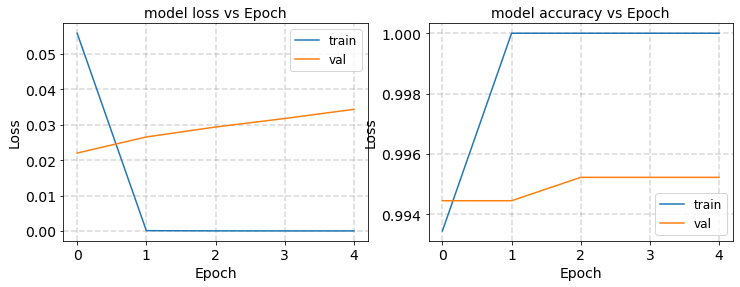

7
Epoch 1/5
1250/1250 - 3s - loss: 0.0956 - accuracy: 0.9928 - val_loss: 0.0318 - val_accuracy: 0.9938
Epoch 2/5
1250/1250 - 3s - loss: 1.5757e-04 - accuracy: 1.0000 - val_loss: 0.0368 - val_accuracy: 0.9938
Epoch 3/5
1250/1250 - 3s - loss: 2.4297e-05 - accuracy: 1.0000 - val_loss: 0.0389 - val_accuracy: 0.9930
Epoch 4/5
1250/1250 - 3s - loss: 6.9896e-06 - accuracy: 1.0000 - val_loss: 0.0429 - val_accuracy: 0.9938
Epoch 5/5
1250/1250 - 3s - loss: 2.0586e-06 - accuracy: 1.0000 - val_loss: 0.0472 - val_accuracy: 0.9938


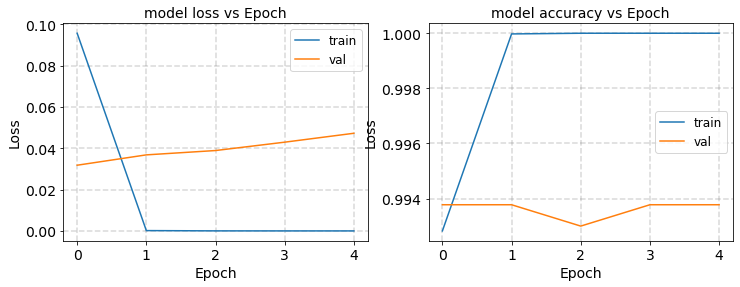

2
Epoch 1/5
1250/1250 - 3s - loss: 0.0974 - accuracy: 0.9893 - val_loss: 0.0594 - val_accuracy: 0.9867
Epoch 2/5
1250/1250 - 3s - loss: 5.1003e-04 - accuracy: 1.0000 - val_loss: 0.0774 - val_accuracy: 0.9875
Epoch 3/5
1250/1250 - 3s - loss: 6.7480e-05 - accuracy: 1.0000 - val_loss: 0.0884 - val_accuracy: 0.9875
Epoch 4/5
1250/1250 - 3s - loss: 2.0753e-05 - accuracy: 1.0000 - val_loss: 0.0951 - val_accuracy: 0.9875
Epoch 5/5
1250/1250 - 3s - loss: 7.5808e-06 - accuracy: 1.0000 - val_loss: 0.1029 - val_accuracy: 0.9859


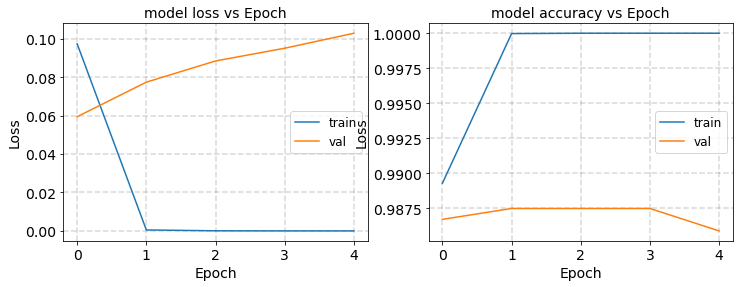

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_flatten_ (None, 784)               1         
_________________________________________________________________
prune_low_magnitude_dense_48 (None, 256)               401666    
_________________________________________________________________
prune_low_magnitude_dense_49 (None, 256)               131330    
_________________________________________________________________
prune_low_magnitude_dense_50 (None, 256)               131330    
_________________________________________________________________
prune_low_magnitude_dense_51 (None, 256)               131330    
_________________________________________________________________
dense_53 (Dense)             (None, 4)                 1028      
Total params: 796,685
Trainable params: 399,364
Non-trainable params: 397,321
_________________________________________

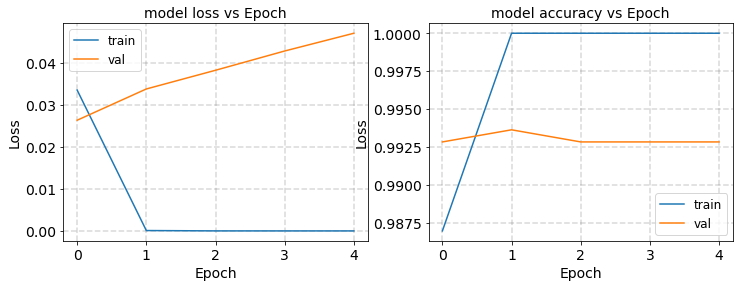

2
Epoch 1/5
1250/1250 - 3s - loss: 0.0694 - accuracy: 0.9865 - val_loss: 0.0407 - val_accuracy: 0.9922
Epoch 2/5
1250/1250 - 3s - loss: 0.0013 - accuracy: 0.9997 - val_loss: 0.0474 - val_accuracy: 0.9922
Epoch 3/5
1250/1250 - 3s - loss: 3.7540e-05 - accuracy: 1.0000 - val_loss: 0.0584 - val_accuracy: 0.9922
Epoch 4/5
1250/1250 - 3s - loss: 9.8997e-06 - accuracy: 1.0000 - val_loss: 0.0656 - val_accuracy: 0.9922
Epoch 5/5
1250/1250 - 3s - loss: 3.7611e-06 - accuracy: 1.0000 - val_loss: 0.0715 - val_accuracy: 0.9922


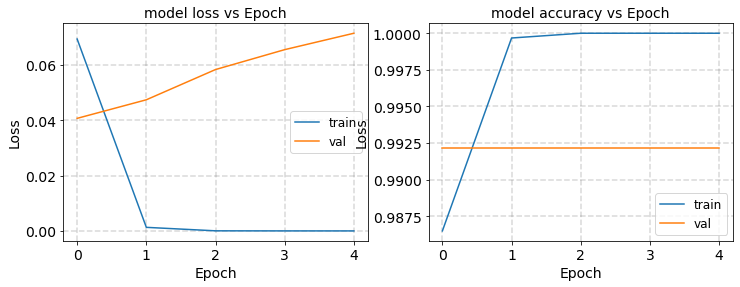

4
Epoch 1/5
1250/1250 - 3s - loss: 0.0713 - accuracy: 0.9882 - val_loss: 0.0297 - val_accuracy: 0.9906
Epoch 2/5
1250/1250 - 3s - loss: 0.0025 - accuracy: 0.9995 - val_loss: 0.0345 - val_accuracy: 0.9906
Epoch 3/5
1250/1250 - 3s - loss: 3.6469e-04 - accuracy: 0.9999 - val_loss: 0.0427 - val_accuracy: 0.9914
Epoch 4/5
1250/1250 - 3s - loss: 1.8711e-05 - accuracy: 1.0000 - val_loss: 0.0472 - val_accuracy: 0.9922
Epoch 5/5
1250/1250 - 3s - loss: 6.3605e-06 - accuracy: 1.0000 - val_loss: 0.0521 - val_accuracy: 0.9922


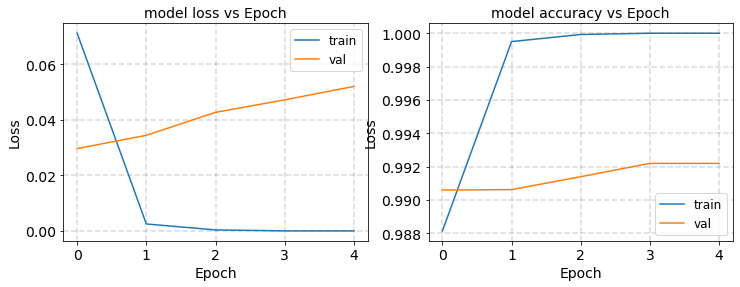

7
Epoch 1/5
1250/1250 - 3s - loss: 0.0613 - accuracy: 0.9896 - val_loss: 0.0442 - val_accuracy: 0.9914
Epoch 2/5
1250/1250 - 3s - loss: 0.0015 - accuracy: 0.9996 - val_loss: 0.0423 - val_accuracy: 0.9938
Epoch 3/5
1250/1250 - 3s - loss: 4.0906e-05 - accuracy: 1.0000 - val_loss: 0.0462 - val_accuracy: 0.9930
Epoch 4/5
1250/1250 - 3s - loss: 9.2866e-06 - accuracy: 1.0000 - val_loss: 0.0507 - val_accuracy: 0.9930
Epoch 5/5
1250/1250 - 3s - loss: 2.8346e-06 - accuracy: 1.0000 - val_loss: 0.0539 - val_accuracy: 0.9922


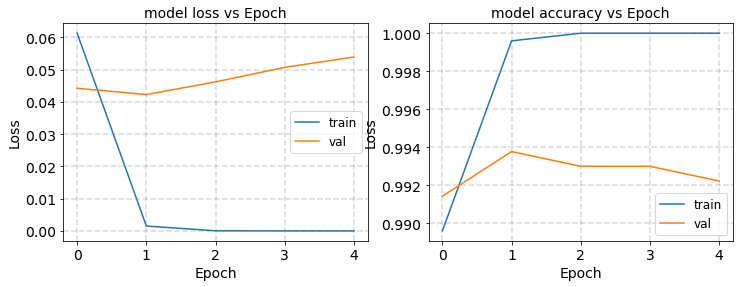

round1 [7 4 6 2]
7
Epoch 1/5
1250/1250 - 3s - loss: 9.9362e-07 - accuracy: 1.0000 - val_loss: 0.0580 - val_accuracy: 0.9938
Epoch 2/5
1250/1250 - 3s - loss: 3.9393e-07 - accuracy: 1.0000 - val_loss: 0.0611 - val_accuracy: 0.9938
Epoch 3/5
1250/1250 - 3s - loss: 1.7459e-07 - accuracy: 1.0000 - val_loss: 0.0636 - val_accuracy: 0.9938
Epoch 4/5
1250/1250 - 3s - loss: 8.2451e-08 - accuracy: 1.0000 - val_loss: 0.0659 - val_accuracy: 0.9938
Epoch 5/5
1250/1250 - 3s - loss: 4.0285e-08 - accuracy: 1.0000 - val_loss: 0.0682 - val_accuracy: 0.9938


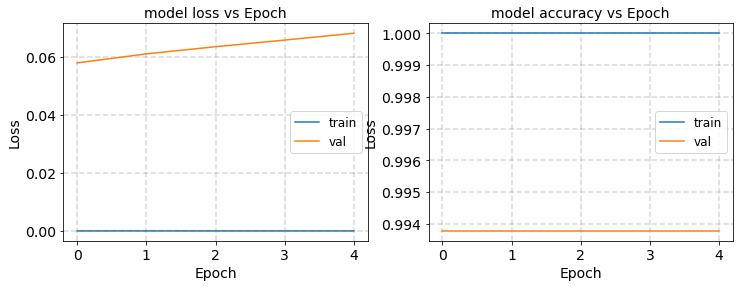

4
Epoch 1/5
1250/1250 - 3s - loss: 0.0919 - accuracy: 0.9890 - val_loss: 0.0316 - val_accuracy: 0.9914
Epoch 2/5
1250/1250 - 3s - loss: 4.1148e-04 - accuracy: 0.9999 - val_loss: 0.0469 - val_accuracy: 0.9922
Epoch 3/5
1250/1250 - 3s - loss: 1.4538e-05 - accuracy: 1.0000 - val_loss: 0.0537 - val_accuracy: 0.9922
Epoch 4/5
1250/1250 - 3s - loss: 3.4129e-06 - accuracy: 1.0000 - val_loss: 0.0619 - val_accuracy: 0.9922
Epoch 5/5
1250/1250 - 3s - loss: 8.2519e-07 - accuracy: 1.0000 - val_loss: 0.0672 - val_accuracy: 0.9922


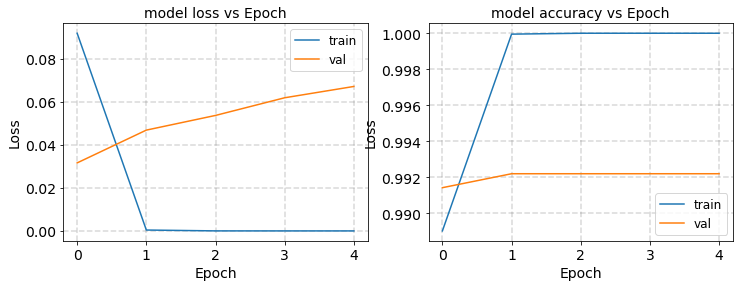

6
Epoch 1/5
1250/1250 - 3s - loss: 0.0685 - accuracy: 0.9926 - val_loss: 0.0369 - val_accuracy: 0.9928
Epoch 2/5
1250/1250 - 3s - loss: 1.7822e-04 - accuracy: 1.0000 - val_loss: 0.0463 - val_accuracy: 0.9944
Epoch 3/5
1250/1250 - 3s - loss: 1.7997e-05 - accuracy: 1.0000 - val_loss: 0.0555 - val_accuracy: 0.9936
Epoch 4/5
1250/1250 - 3s - loss: 5.5966e-06 - accuracy: 1.0000 - val_loss: 0.0627 - val_accuracy: 0.9936
Epoch 5/5
1250/1250 - 3s - loss: 1.8997e-06 - accuracy: 1.0000 - val_loss: 0.0690 - val_accuracy: 0.9936


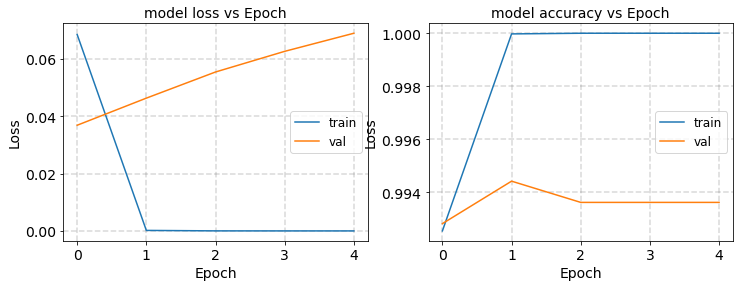

2
Epoch 1/5
1250/1250 - 3s - loss: 0.0731 - accuracy: 0.9871 - val_loss: 0.0534 - val_accuracy: 0.9906
Epoch 2/5
1250/1250 - 3s - loss: 3.2847e-04 - accuracy: 1.0000 - val_loss: 0.0663 - val_accuracy: 0.9898
Epoch 3/5
1250/1250 - 3s - loss: 2.5991e-05 - accuracy: 1.0000 - val_loss: 0.0845 - val_accuracy: 0.9906
Epoch 4/5
1250/1250 - 3s - loss: 3.5575e-06 - accuracy: 1.0000 - val_loss: 0.0962 - val_accuracy: 0.9906
Epoch 5/5
1250/1250 - 3s - loss: 1.0848e-06 - accuracy: 1.0000 - val_loss: 0.1061 - val_accuracy: 0.9906


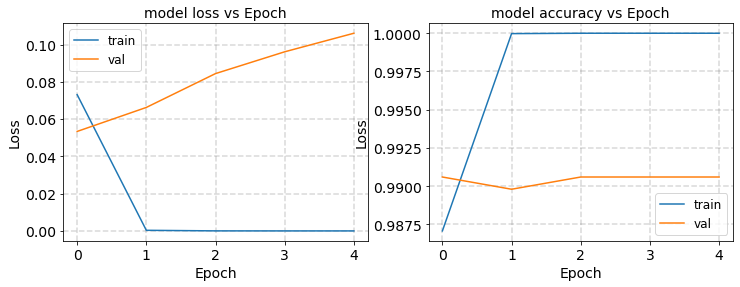

round2 [7 6 2 4]
7
Epoch 1/5
1250/1250 - 3s - loss: 0.0945 - accuracy: 0.9907 - val_loss: 0.0424 - val_accuracy: 0.9898
Epoch 2/5
1250/1250 - 3s - loss: 2.5041e-04 - accuracy: 1.0000 - val_loss: 0.0509 - val_accuracy: 0.9898
Epoch 3/5
1250/1250 - 3s - loss: 2.8693e-05 - accuracy: 1.0000 - val_loss: 0.0597 - val_accuracy: 0.9898
Epoch 4/5
1250/1250 - 3s - loss: 8.1331e-06 - accuracy: 1.0000 - val_loss: 0.0670 - val_accuracy: 0.9898
Epoch 5/5
1250/1250 - 3s - loss: 2.8324e-06 - accuracy: 1.0000 - val_loss: 0.0717 - val_accuracy: 0.9898


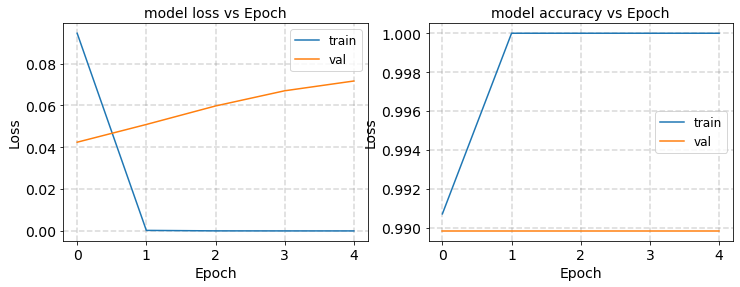

6
Epoch 1/5
1250/1250 - 3s - loss: 0.0645 - accuracy: 0.9915 - val_loss: 0.0389 - val_accuracy: 0.9929
Epoch 2/5
1250/1250 - 3s - loss: 8.4570e-04 - accuracy: 0.9998 - val_loss: 0.0464 - val_accuracy: 0.9936
Epoch 3/5
1250/1250 - 3s - loss: 8.7432e-05 - accuracy: 1.0000 - val_loss: 0.0570 - val_accuracy: 0.9928
Epoch 4/5
1250/1250 - 3s - loss: 2.2298e-05 - accuracy: 1.0000 - val_loss: 0.0644 - val_accuracy: 0.9936
Epoch 5/5
1250/1250 - 3s - loss: 7.2457e-06 - accuracy: 1.0000 - val_loss: 0.0712 - val_accuracy: 0.9936


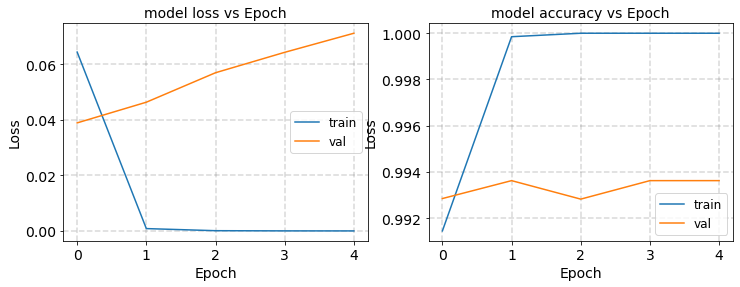

2
Epoch 1/5
1250/1250 - 3s - loss: 0.0739 - accuracy: 0.9874 - val_loss: 0.0519 - val_accuracy: 0.9851
Epoch 2/5
1250/1250 - 3s - loss: 2.6620e-04 - accuracy: 1.0000 - val_loss: 0.0612 - val_accuracy: 0.9867
Epoch 3/5
1250/1250 - 3s - loss: 3.0504e-05 - accuracy: 1.0000 - val_loss: 0.0705 - val_accuracy: 0.9883
Epoch 4/5
1250/1250 - 3s - loss: 8.3868e-06 - accuracy: 1.0000 - val_loss: 0.0784 - val_accuracy: 0.9890
Epoch 5/5
1250/1250 - 3s - loss: 2.8835e-06 - accuracy: 1.0000 - val_loss: 0.0859 - val_accuracy: 0.9898


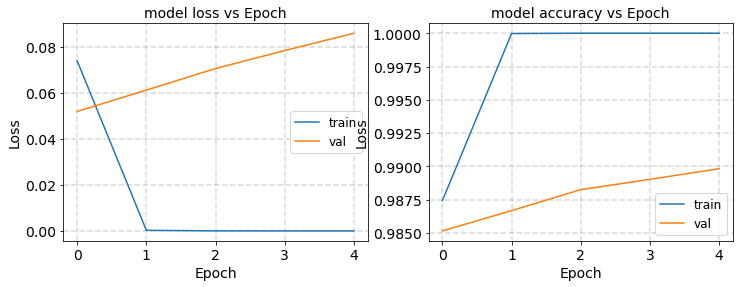

4
Epoch 1/5
1250/1250 - 3s - loss: 0.0920 - accuracy: 0.9876 - val_loss: 0.0380 - val_accuracy: 0.9930
Epoch 2/5
1250/1250 - 3s - loss: 7.2556e-04 - accuracy: 0.9998 - val_loss: 0.0549 - val_accuracy: 0.9930
Epoch 3/5
1250/1250 - 3s - loss: 6.7380e-05 - accuracy: 1.0000 - val_loss: 0.0643 - val_accuracy: 0.9930
Epoch 4/5
1250/1250 - 3s - loss: 1.9716e-05 - accuracy: 1.0000 - val_loss: 0.0710 - val_accuracy: 0.9930
Epoch 5/5
1250/1250 - 3s - loss: 6.5407e-06 - accuracy: 1.0000 - val_loss: 0.0783 - val_accuracy: 0.9922


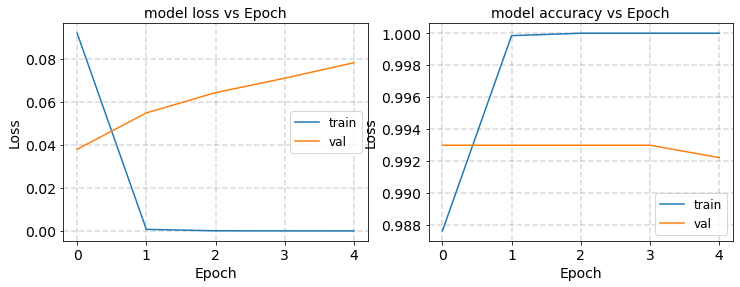

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_flatten_ (None, 784)               1         
_________________________________________________________________
prune_low_magnitude_dense_54 (None, 256)               401666    
_________________________________________________________________
prune_low_magnitude_dense_55 (None, 256)               131330    
_________________________________________________________________
prune_low_magnitude_dense_56 (None, 256)               131330    
_________________________________________________________________
prune_low_magnitude_dense_57 (None, 256)               131330    
_________________________________________________________________
dense_59 (Dense)             (None, 4)                 1028      
Total params: 796,685
Trainable params: 399,364
Non-trainable params: 397,321
_________________________________________

In [6]:
%%time
series = [2,4,6,7]
num_runs = 10
name = '2467_seq_prune_08_4_256_run'
for i in range(num_runs):
    print(f'run {i}')
    full_name = name + str(i)
    
    
    model, history = nc.make_train_sequential_model(x_train=x_train,
                                  y_train=y_train,
                                  x_test=x_test,
                                  y_test=y_test,
                                  series=series,
                                  num_hidden_layers=4,
                                  num_hidden_nodes=256,
                                  num_output_nodes=4,
                                  pruning=0.8,
                                  epochs_per_numeral=5,
                                  num_cycles = 3, 
                                  verbose=2,
                                  summary=False)
    
    exp_dict[full_name] = nc.get_n_cuts_and_p_value(
                        model = model,
                        model_history = history,
                        num_clusters=4,
                        random_state=None,
                        identity=False,
                        start=1,
                        num_shuffle_trials=20)


#### Convert Results to a dataframe

In [7]:
df = pd.DataFrame(exp_dict)
df = df.T
df_models = df.iloc[:, 0]
df.columns = ['model','N_cut','Mean_n_cut_rand', 'Std_n_cut_rand', 'Ste_n_cut_rand', 'Percentile','P_value', 'Significance','Direction', 'Accuracy']
df = df.drop('model', axis=1)
df

N_cut Mean_n_cut_rand Std_n_cut_rand  \
2467_seq_prune_08_4_256_run0  2.00241         1.98836      0.0113266   
2467_seq_prune_08_4_256_run1  2.00526         1.97609      0.0159491   
2467_seq_prune_08_4_256_run2   1.9026          1.8937       0.017896   
2467_seq_prune_08_4_256_run3  2.00591         2.00826      0.0120354   
2467_seq_prune_08_4_256_run4  1.93367         1.91221      0.0188635   
2467_seq_prune_08_4_256_run5  1.94349         1.90584      0.0149476   
2467_seq_prune_08_4_256_run6  1.96419         1.94286      0.0138639   
2467_seq_prune_08_4_256_run7  1.98015         1.94084      0.0138218   
2467_seq_prune_08_4_256_run8  1.94718         1.94289      0.0203897   
2467_seq_prune_08_4_256_run9  2.01381         1.96952      0.0178004   

                             Ste_n_cut_rand Percentile P_value Significance  \
2467_seq_prune_08_4_256_run0     0.00253269         95     0.1           No   
2467_seq_prune_08_4_256_run1     0.00356633         95     0.1           No   
2467_seq_prune_08_4_256_run2     0.00400167         65     0.7           No   
2467_seq_prune_08_4_256_run3     0.00269119         35     0.7           No   
2467_seq_prune_08_4_256_run4       0.004218         85     0.3           No   
2467_seq_prune_08_4_256_run5     0.00334238        100       0          Yes   
2467_seq_prune_08_4_256_run6     0.00310005         95     0.1           No   
2467_seq_prune_08_4_256_run7     0.00309064        100       0          Yes   
2467_seq_prune_08_4_256_run8     0.00455928         50       1           No   
2467_seq_prune_08_4_256_run9      0.0039803        100       0          Yes   

                             Direction  Accuracy  
2467_seq_prune_08_4_256_run0    larger  0.977225  
2467_seq_prune_08_4_256_run1    larger    0.9749  
2467_seq_prune_08_4_256_run2    larger    0.9772  
2467_seq_prune_08_4_256_run3   smaller  0.981125  
2467_seq_prune_08_4_256_run4    larger  0.969375  
2467_seq_prune_08_4_256_run5    larger  0.979625  
2467_seq_prune_08_4_256_run6    larger    0.9741  
2467_seq_prune_08_4_256_run7    larger   0.97645  
2467_seq_prune_08_4_256_run8    larger   0.97415  
2467_seq_prune_08_4_256_run9    larger  0.975725

#### Save dataframe

In [8]:
import pickle
path = './Exps/'
with open(path + 'df_'+ name, 'wb') as fp:
    pickle.dump(df, fp)
    
with open(path + 'df_'+ name, 'rb') as fp:
    df = pickle.load(fp)
df

N_cut Mean_n_cut_rand Std_n_cut_rand  \
2467_seq_prune_08_4_256_run0  2.00241         1.98836      0.0113266   
2467_seq_prune_08_4_256_run1  2.00526         1.97609      0.0159491   
2467_seq_prune_08_4_256_run2   1.9026          1.8937       0.017896   
2467_seq_prune_08_4_256_run3  2.00591         2.00826      0.0120354   
2467_seq_prune_08_4_256_run4  1.93367         1.91221      0.0188635   
2467_seq_prune_08_4_256_run5  1.94349         1.90584      0.0149476   
2467_seq_prune_08_4_256_run6  1.96419         1.94286      0.0138639   
2467_seq_prune_08_4_256_run7  1.98015         1.94084      0.0138218   
2467_seq_prune_08_4_256_run8  1.94718         1.94289      0.0203897   
2467_seq_prune_08_4_256_run9  2.01381         1.96952      0.0178004   

                             Ste_n_cut_rand Percentile P_value Significance  \
2467_seq_prune_08_4_256_run0     0.00253269         95     0.1           No   
2467_seq_prune_08_4_256_run1     0.00356633         95     0.1           No   
2467_seq_prune_08_4_256_run2     0.00400167         65     0.7           No   
2467_seq_prune_08_4_256_run3     0.00269119         35     0.7           No   
2467_seq_prune_08_4_256_run4       0.004218         85     0.3           No   
2467_seq_prune_08_4_256_run5     0.00334238        100       0          Yes   
2467_seq_prune_08_4_256_run6     0.00310005         95     0.1           No   
2467_seq_prune_08_4_256_run7     0.00309064        100       0          Yes   
2467_seq_prune_08_4_256_run8     0.00455928         50       1           No   
2467_seq_prune_08_4_256_run9      0.0039803        100       0          Yes   

                             Direction  Accuracy  
2467_seq_prune_08_4_256_run0    larger  0.977225  
2467_seq_prune_08_4_256_run1    larger    0.9749  
2467_seq_prune_08_4_256_run2    larger    0.9772  
2467_seq_prune_08_4_256_run3   smaller  0.981125  
2467_seq_prune_08_4_256_run4    larger  0.969375  
2467_seq_prune_08_4_256_run5    larger  0.979625  
2467_seq_prune_08_4_256_run6    larger    0.9741  
2467_seq_prune_08_4_256_run7    larger   0.97645  
2467_seq_prune_08_4_256_run8    larger   0.97415  
2467_seq_prune_08_4_256_run9    larger  0.975725

In [9]:
df_models[0].layers[1].get_weights()[0]

array([[-0.        ,  0.        ,  0.        , ...,  0.        ,
        -0.        ,  0.        ],
       [-0.        ,  0.        , -0.        , ...,  0.        ,
        -0.        , -0.07055741],
       [-0.        , -0.        ,  0.        , ..., -0.06674267,
        -0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        , -0.        , ..., -0.06755143,
        -0.        ,  0.        ],
       [ 0.        , -0.        ,  0.06299032, ...,  0.06978136,
        -0.        , -0.        ],
       [ 0.        , -0.        , -0.        , ...,  0.        ,
        -0.06929971,  0.        ]], dtype=float32)

#### Look at results of first experiment

In [10]:
for val in exp_dict[name + str(0)]:
    print(val)

2.002411177720509
1.9883556526928985
0.011326553453377039
0.002532694347253605
95.0
0.1
No
larger
0.9772250056266785


In [11]:
file_list = ['df_2467_sim_prune_0_4_64_run',
            'df_2467_sim_prune_0_4_128_run',
            'df_2467_sim_prune_0_4_256_run',
            'df_2467_sim_prune_04_4_64_run',
            'df_2467_sim_prune_04_4_128_run',
            'df_2467_sim_prune_04_4_256_run',
            'df_2467_sim_prune_08_2_32_run',
            'df_2467_sim_prune_08_4_64_run',
            'df_2467_sim_prune_08_4_128_run',
            'df_2467_sim_prune_08_4_256_run']
dfs = []
for f in file_list:
    file = './Exps/sim/' + f
    with open(f, 'rb') as fp:
        dfs.append(pickle.load(f))

FileNotFoundError: [Errno 2] No such file or directory: 'df_2467_sim_prune_0_4_64_run'